About the Company:

The dataset encompasses transactions from 01/12/2010 to 09/12/2011 for a non-store
online retail business based and registered in the UK. Specializing in distinctive
all-occasion gifts, the company's clientele includes a significant number of wholesale
customers.


About the dataset:

The dataset consists of retail transactions with the following key variables:

1. InvoiceNo: A unique 6-digit invoice number. If it starts with the letter 'C', it indicates a cancellation.
2. StockCode: A unique 5-digit product code for each item.
3. Description: The name of the product.
4. Quantity: The number of units of each product per transaction. A negative quantity represents a return transaction.
5. InvoiceDate: The date and time the transaction was generated.
6. UnitPrice: The price per unit of the product. Transactions with a unit price of zero indicate a free item.
7. CustomerID: A unique 5-digit number assigned to each customer.
8. Country: The country where the customer resides.

# Business Problem:

This case study aims to uncover valuable insights into customer behavior and purchasing patterns through CRM analysis. By evaluating customer preferences and feedback, the goal is to better understand their needs and expectations, enabling the company to enhance customer engagement and optimize marketing strategies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv("Ecom_CRM_analysis.csv",encoding='ISO-8859-1')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Preprocessing

In [ ]:
# Converting InvoiceDate column from object to pandas datetime object
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Checking missing values
df.isna().sum()*100/len(df)

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [ ]:
print("Number of unique products that have description missing:",df[df['Description'].isna()]['StockCode'].nunique())
df[df['Description'].isna()]


Number of unique products that have description missing: 960


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
# Finding rows where Description is missing and getting their StockCode
missing_description_stockcodes = df[df['Description'].isna()]['StockCode'].unique()

# Filtering rows where the StockCode is in the missing_description_stockcodes, but Description is not missing
available_descriptions = df[df['StockCode'].isin(missing_description_stockcodes) & df['Description'].notna()]
available_descriptions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541858,581580,79321,CHILLI LIGHTS,2,2011-12-09 12:20:00,5.75,12748.0,United Kingdom
541874,581585,23084,RABBIT NIGHT LIGHT,12,2011-12-09 12:31:00,2.08,15804.0,United Kingdom
541879,581585,22726,ALARM CLOCK BAKELIKE GREEN,8,2011-12-09 12:31:00,3.75,15804.0,United Kingdom
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,2011-12-09 12:31:00,0.85,15804.0,United Kingdom


In [ ]:
available_descriptions['StockCode'].nunique()

848

Out of 960 stockcodes where the descriptions are null, we have descriptions available for 848 stockcodes elsewhere in the dataset.

Filling in the missing Description values based on the most frequent Description for each StockCode in the available_descriptions

In [ ]:
# Find the most frequent Description for each StockCode where Description is not missing
most_frequent_descriptions = available_descriptions.groupby('StockCode')['Description'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Converting it into a dictionary for easy mapping
description_map = dict(zip(most_frequent_descriptions['StockCode'], most_frequent_descriptions['Description']))

# Filling missing Description in df based on the most frequent Description from available_descriptions
df['Description'] = df.apply(lambda row: description_map.get(row['StockCode']) if pd.isna(row['Description']) else row['Description'], axis=1)


In [ ]:
# Identifying rows where Description is still null
missing_description_indices = df[df['Description'].isna()].index


print(f"Number of unique StockCodes still with missing Description: {len(missing_description_indices)}")


Number of unique StockCodes still with missing Description: 112


In [ ]:
# Creating placeholders for missing descriptions
for i, index in enumerate(missing_description_indices, start=1):
    df.at[index, 'Description'] = f"Unknown Product {i}"

# Verifying that there are no more missing descriptions
missing_count_after_fill = df['Description'].isna().sum()
print(f"Number of missing Descriptions after filling: {missing_count_after_fill}")


Number of missing Descriptions after filling: 0


In [ ]:
# Counting unique Descriptions for each StockCode
stockcodes_multiple_descriptions_full_df = df.groupby('StockCode')['Description'].nunique()

# Filtering to get StockCodes with more than one unique Description
stockcodes_with_multiple_descriptions_full_df = stockcodes_multiple_descriptions_full_df[stockcodes_multiple_descriptions_full_df > 1].index

# Filtering df to show rows with StockCodes that have multiple Descriptions
df_multiple_descriptions_full = df[df['StockCode'].isin(stockcodes_with_multiple_descriptions_full_df)]

print("Number of StockCodes with more than one description:",df_multiple_descriptions_full['StockCode'].nunique())
df_multiple_descriptions_full

Number of StockCodes with more than one description: 650


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541884,581585,84946,ANTIQUE SILVER T-LIGHT GLASS,12,2011-12-09 12:31:00,1.25,15804.0,United Kingdom
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df['StockCode'].nunique()

4070

In [ ]:
# Counting unique Descriptions for each StockCode
stockcode_description_counts = df.groupby('StockCode')['Description'].nunique()

# Sorting the counts in descending order
sorted_stockcode_description_counts = stockcode_description_counts[stockcode_description_counts > 1].sort_values(ascending=False)


print(sorted_stockcode_description_counts)


StockCode
20713           8
23084           7
85175           6
21830           6
85172           5
               ..
22777           2
22784           2
22785           2
22792           2
gift_0001_20    2
Name: Description, Length: 650, dtype: int64


In [ ]:
df[df['StockCode']=='20713']['Description'].value_counts()

,count
Description,
JUMBO BAG OWLS,677
wrongly marked. 23343 in box,1
wrongly coded-23343,1
found,1
Found,1
wrongly marked 23343,1
Marked as 23343,1
wrongly coded 23343,1


In [ ]:
# Creating a copy of the DataFrame to avoid modifying the original one
df_replaced = df.copy()

# Getting unique StockCodes with multiple descriptions
stockcodes_with_multiple = df_replaced.groupby('StockCode')['Description'].nunique()
stockcodes_with_multiple = stockcodes_with_multiple[stockcodes_with_multiple > 1].index

# Looping through each StockCode with multiple descriptions
for stockcode in stockcodes_with_multiple:
    # Get descriptions for the current stockcode
    descriptions = df_replaced[df_replaced['StockCode'] == stockcode]['Description']

    # Find the most common description
    most_common_description = descriptions.mode()[0]

    # Replace all descriptions that are not the most common with the most common description
    df_replaced.loc[df_replaced['StockCode'] == stockcode, 'Description'] = descriptions.where(
        descriptions == most_common_description, most_common_description)


In [ ]:
# Group by StockCode and count unique Descriptions
final_stockcodes_description_counts = df_replaced.groupby('StockCode')['Description'].nunique()

# Filtering for StockCodes that have more than one unique Description
stockcodes_with_multiple_descriptions_final = final_stockcodes_description_counts[final_stockcodes_description_counts > 1]

# Getting the unique count of StockCodes that still have multiple descriptions
num_stockcodes_with_multiple_descriptions = stockcodes_with_multiple_descriptions_final.count()


print("Number of StockCodes that still have multiple descriptions:", num_stockcodes_with_multiple_descriptions)


Number of StockCodes that still have multiple descriptions: 0


In [ ]:
df_replaced.isna().sum()*100/len(df_replaced)

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [ ]:
# An example where customer id is missing, but it is the same order
df_replaced[(df_replaced['CustomerID'].isna())& (df_replaced['InvoiceNo']=='536544')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1965,536544,21721,CANDY SHOP STICKER SHEET,1,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1966,536544,21722,SWEET PUDDING STICKER SHEET,1,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1967,536544,21731,RED TOADSTOOL LED NIGHT LIGHT,5,2010-12-01 14:32:00,3.36,NaN,United Kingdom
1968,536544,21742,LARGE ROUND WICKER PLATTER,1,2010-12-01 14:32:00,12.72,NaN,United Kingdom


In [ ]:
df_replaced[df_replaced['CustomerID'].isna()]['InvoiceNo'].nunique()

3710

There are 3598 distinct orders for which customer ids are missing

Checking if there are InvoiceNos where the CustomerID is missing but there is at least one non-null CustomerID for the same InvoiceNo

In [ ]:
# Group by 'InvoiceNo' and check for null and non-null CustomerIDs
invoice_groups = df_replaced.groupby('InvoiceNo')['CustomerID'].apply(lambda x: (x.isna().any(), x.notna().any()))

# Filtering to find InvoiceNos with at least one missing and one non-missing CustomerID
valid_invoices_with_mixed_customer_ids = invoice_groups[invoice_groups.apply(lambda x: x[0] and x[1])].index


print(valid_invoices_with_mixed_customer_ids)


Index([], dtype='object', name='InvoiceNo')


Filling missing customer ids based on invoice numbers.
For e.g., if for a particular invoice number, customer ids are missing, then we will consider all the missing customer ids here as Unknown Customer 1 because it is the same order

In [ ]:
# Grouping InvoiceNo
missing_customer_ids = df_replaced[df_replaced['CustomerID'].isna()].groupby('InvoiceNo')['CustomerID'].first().reset_index()

# Replacing None values with Unknown Customer identifiers
missing_customer_ids['CustomerID'] = [f'Unknown Customer {i+1}' for i in range(len(missing_customer_ids))]

# Now, we can update the original df_replaced DataFrame using this mapping
for index, row in missing_customer_ids.iterrows():
    invoice_no = row['InvoiceNo']
    unknown_customer_id = row['CustomerID']

    # Filling the missing CustomerID in the original DataFrame
    df_replaced.loc[df_replaced['InvoiceNo'] == invoice_no, 'CustomerID'] = unknown_customer_id


In [ ]:
# Check if there are still missing CustomerIDs
remaining_missing_customer_ids = df_replaced[df_replaced['CustomerID'].isna()]
print("Remaining missing CustomerIDs:", remaining_missing_customer_ids.shape[0])

Remaining missing CustomerIDs: 0


In [ ]:
# Example where missing customer id is filled based on one order
df_replaced[(df_replaced['InvoiceNo']=='536544')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,Unknown Customer 2,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,Unknown Customer 2,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,Unknown Customer 2,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,Unknown Customer 2,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,Unknown Customer 2,United Kingdom
...,...,...,...,...,...,...,...,...
1965,536544,21721,CANDY SHOP STICKER SHEET,1,2010-12-01 14:32:00,1.66,Unknown Customer 2,United Kingdom
1966,536544,21722,SWEET PUDDING STICKER SHEET,1,2010-12-01 14:32:00,1.66,Unknown Customer 2,United Kingdom
1967,536544,21731,RED TOADSTOOL LED NIGHT LIGHT,5,2010-12-01 14:32:00,3.36,Unknown Customer 2,United Kingdom
1968,536544,21742,LARGE ROUND WICKER PLATTER,1,2010-12-01 14:32:00,12.72,Unknown Customer 2,United Kingdom


In [ ]:
df_replaced.isna().sum()*100/len(df_replaced)

,0
InvoiceNo,0.0
StockCode,0.0
Description,0.0
Quantity,0.0
InvoiceDate,0.0
UnitPrice,0.0
CustomerID,0.0
Country,0.0


There are no more missing values in the dataset

In [ ]:
# Checking for duplicates
df_replaced.duplicated().sum()

5270

In [ ]:
df_replaced[df_replaced.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
df_replaced[(df_replaced['InvoiceNo']=='581538') & (df_replaced['StockCode']=='22068')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541631,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom


In [ ]:
print("Shape before dropping:",df_replaced.shape)

# Dropping duplicates and keeping the first occurrence
df_replaced = df_replaced.drop_duplicates(keep='first')

print("Shape after dropping:",df_replaced.shape)

Shape before dropping: (541909, 8)
Shape after dropping: (536639, 8)


In [ ]:
df_replaced.duplicated().sum()

0

# EDA

In [ ]:
# Creating a new column for total spent
df_replaced['TotalSpent'] = df_replaced['Quantity'] * df_replaced['UnitPrice']
df_replaced

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
# Creating 'is_free_item' column based on the conditions UnitPrice = 0, Quantity > 0, and the InvoiceNo should not start with 'C'
df_replaced['is_free_item'] = df_replaced.apply(
    lambda row: 'Yes' if (row['UnitPrice'] == 0 and row['Quantity'] > 0 and not str(row['InvoiceNo']).lower().startswith('c')) else 'No', axis=1
)


In [ ]:
# Creating 'is_returned_item' column based on the conditions InvoiceNo does not start with 'C' and Quantity < 0
df_replaced['is_returned_item'] = df_replaced.apply(
    lambda row: 'Yes' if (row['Quantity'] < 0 and not str(row['InvoiceNo']).lower().startswith('c')) else 'No', axis=1
)


In [ ]:
df_replaced.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSpent', 'is_free_item',
       'is_returned_item'],
      dtype='object')

In [ ]:
# Bringing the dataset into customer-order level

# Grouping by CustomerID and InvoiceNo
customer_invoice_level_df = df_replaced.groupby(['CustomerID', 'InvoiceNo']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSpent=('TotalSpent', 'sum'),
    No_of_unique_products=('StockCode', 'nunique'),
    InvoiceDate=('InvoiceDate', 'first'),
    Country=('Country', 'first'),
    No_of_free_items=('is_free_item', lambda x: (x == 'Yes').sum()),  # Counting 'Yes' as 1 for free items
    No_of_returned_items=('is_returned_item', lambda x: (x == 'Yes').sum())  # Counting 'Yes' as 1 for returned items
).reset_index()

customer_invoice_level_df


,CustomerID,InvoiceNo,TotalQuantity,TotalSpent,No_of_unique_products,InvoiceDate,Country,No_of_free_items,No_of_returned_items
0,12346.0,541431,74215,77183.60,1,2011-01-18 10:01:00,United Kingdom,0,0
1,12346.0,C541433,-74215,-77183.60,1,2011-01-18 10:17:00,United Kingdom,0,0
2,12347.0,537626,319,711.79,31,2010-12-07 14:57:00,Iceland,0,0
3,12347.0,542237,315,475.39,29,2011-01-26 14:30:00,Iceland,0,0
4,12347.0,549222,483,636.25,24,2011-04-07 10:43:00,Iceland,0,0
...,...,...,...,...,...,...,...,...,...
25895,Unknown Customer 995,548206,-53,0.00,1,2011-03-29 16:56:00,United Kingdom,0,1
25896,Unknown Customer 996,548207,25,0.00,1,2011-03-29 17:11:00,United Kingdom,1,0
25897,Unknown Customer 997,548209,-30,0.00,1,2011-03-29 17:21:00,United Kingdom,0,1
25898,Unknown Customer 998,548219,5,13.77,2,2011-03-30 09:46:00,United Kingdom,0,0


In [ ]:
# Creating 'is_cancelled' column at the invoice level
customer_invoice_level_df['is_cancelled'] = customer_invoice_level_df['InvoiceNo'].apply(lambda x: 'Yes' if str(x).lower().startswith('c') else 'No')
customer_invoice_level_df

,CustomerID,InvoiceNo,TotalQuantity,TotalSpent,No_of_unique_products,InvoiceDate,Country,No_of_free_items,No_of_returned_items,is_cancelled
0,12346.0,541431,74215,77183.60,1,2011-01-18 10:01:00,United Kingdom,0,0,No
1,12346.0,C541433,-74215,-77183.60,1,2011-01-18 10:17:00,United Kingdom,0,0,Yes
2,12347.0,537626,319,711.79,31,2010-12-07 14:57:00,Iceland,0,0,No
3,12347.0,542237,315,475.39,29,2011-01-26 14:30:00,Iceland,0,0,No
4,12347.0,549222,483,636.25,24,2011-04-07 10:43:00,Iceland,0,0,No
...,...,...,...,...,...,...,...,...,...,...
25895,Unknown Customer 995,548206,-53,0.00,1,2011-03-29 16:56:00,United Kingdom,0,1,No
25896,Unknown Customer 996,548207,25,0.00,1,2011-03-29 17:11:00,United Kingdom,1,0,No
25897,Unknown Customer 997,548209,-30,0.00,1,2011-03-29 17:21:00,United Kingdom,0,1,No
25898,Unknown Customer 998,548219,5,13.77,2,2011-03-30 09:46:00,United Kingdom,0,0,No


In [ ]:
# Creating 'return_order' column where if No_of_unique_products equals No_of_returned_items, mark as 'Yes', else 'No'
customer_invoice_level_df['return_order'] = customer_invoice_level_df.apply(
    lambda row: 'Yes' if row['No_of_unique_products'] == row['No_of_returned_items'] else 'No', axis=1
)


In [ ]:
# Creating a new column 'InvoiceDateOnly' to store just the date part of the original 'InvoiceDate'
customer_invoice_level_df['InvoiceDateOnly'] = customer_invoice_level_df['InvoiceDate'].dt.date

# Sorting the DataFrame by CustomerID and the new InvoiceDateOnly column
customer_invoice_level_df = customer_invoice_level_df.sort_values(by=['CustomerID', 'InvoiceDateOnly'])

# Converting 'InvoiceDateOnly' to datetime for the calculation
customer_invoice_level_df['InvoiceDateOnly'] = pd.to_datetime(customer_invoice_level_df['InvoiceDateOnly'])

# Calculating the number of days between successive purchases using the date-only column
customer_invoice_level_df['DaysSinceLastPurchase'] = customer_invoice_level_df.groupby('CustomerID')['InvoiceDateOnly'].diff().dt.days.fillna(0).astype(int)


customer_invoice_level_df

,CustomerID,InvoiceNo,TotalQuantity,TotalSpent,No_of_unique_products,InvoiceDate,Country,No_of_free_items,No_of_returned_items,is_cancelled,return_order,InvoiceDateOnly,DaysSinceLastPurchase
0,12346.0,541431,74215,77183.60,1,2011-01-18 10:01:00,United Kingdom,0,0,No,No,2011-01-18,0
1,12346.0,C541433,-74215,-77183.60,1,2011-01-18 10:17:00,United Kingdom,0,0,Yes,No,2011-01-18,0
2,12347.0,537626,319,711.79,31,2010-12-07 14:57:00,Iceland,0,0,No,No,2010-12-07,0
3,12347.0,542237,315,475.39,29,2011-01-26 14:30:00,Iceland,0,0,No,No,2011-01-26,50
4,12347.0,549222,483,636.25,24,2011-04-07 10:43:00,Iceland,0,0,No,No,2011-04-07,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,Unknown Customer 995,548206,-53,0.00,1,2011-03-29 16:56:00,United Kingdom,0,1,No,Yes,2011-03-29,0
25896,Unknown Customer 996,548207,25,0.00,1,2011-03-29 17:11:00,United Kingdom,1,0,No,No,2011-03-29,0
25897,Unknown Customer 997,548209,-30,0.00,1,2011-03-29 17:21:00,United Kingdom,0,1,No,Yes,2011-03-29,0
25898,Unknown Customer 998,548219,5,13.77,2,2011-03-30 09:46:00,United Kingdom,0,0,No,No,2011-03-30,0


In [ ]:
# Extracting day name from InvoiceDate
customer_invoice_level_df['DayName'] = customer_invoice_level_df['InvoiceDate'].dt.day_name()

# Creating new columns for each day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    customer_invoice_level_df[day] = 0  # Initialize all day columns to 0

# Filling the day columns with TotalSpent based on the day names
for day in days_of_week:
    customer_invoice_level_df[day] = customer_invoice_level_df.apply(
        lambda row: row['TotalSpent'] if row['DayName'] == day else 0,
        axis=1
    )

# Adding Weekday and Weekend columns
customer_invoice_level_df['Weekday'] = customer_invoice_level_df[days_of_week[:5]].sum(axis=1)  # Sum for Mon-Fri
customer_invoice_level_df['Weekend'] = customer_invoice_level_df[days_of_week[5:]].sum(axis=1)  # Sum for Sat-Sun

# Dropping the DayName column as it's no longer needed
customer_invoice_level_df=customer_invoice_level_df.drop(columns=['DayName'])



In [ ]:
# Creating new columns for different time periods
time_periods = ['Dawn', 'Morning', 'Afternoon', 'Night']
for period in time_periods:
    customer_invoice_level_df[period] = 0  # Initialize all time period columns to 0

# Extracting the hour of InvoiceDate
customer_invoice_level_df['Hour'] = customer_invoice_level_df['InvoiceDate'].dt.hour

# Function to assign time period based on the hour
def assign_time_period(hour):
    if 0 <= hour < 7:
        return 'Dawn'
    elif 7 <= hour < 13:
        return 'Morning'
    elif 13 <= hour < 19:
        return 'Afternoon'
    else:
        return 'Night'

# Filling the time period columns with TotalSpent based on the hour
for period in time_periods:
    customer_invoice_level_df[period] = customer_invoice_level_df.apply(
        lambda row: row['TotalSpent'] if assign_time_period(row['Hour']) == period else 0,
        axis=1
    )

# Dropping the Hour column as it's no longer needed
customer_invoice_level_df=customer_invoice_level_df.drop(columns=['Hour'])




In [ ]:
customer_invoice_level_df=customer_invoice_level_df.drop('InvoiceDateOnly',axis=1)
customer_invoice_level_df

,CustomerID,InvoiceNo,TotalQuantity,TotalSpent,No_of_unique_products,InvoiceDate,Country,No_of_free_items,No_of_returned_items,is_cancelled,return_order,DaysSinceLastPurchase,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Weekday,Weekend,Dawn,Morning,Afternoon,Night
0,12346.0,541431,74215,77183.60,1,2011-01-18 10:01:00,United Kingdom,0,0,No,No,0,0.0,77183.60,0.00,0.00,0.0,0,0.0,77183.60,0.0,0.0,77183.60,0.00,0.0
1,12346.0,C541433,-74215,-77183.60,1,2011-01-18 10:17:00,United Kingdom,0,0,Yes,No,0,0.0,-77183.60,0.00,0.00,0.0,0,0.0,-77183.60,0.0,0.0,-77183.60,0.00,0.0
2,12347.0,537626,319,711.79,31,2010-12-07 14:57:00,Iceland,0,0,No,No,0,0.0,711.79,0.00,0.00,0.0,0,0.0,711.79,0.0,0.0,0.00,711.79,0.0
3,12347.0,542237,315,475.39,29,2011-01-26 14:30:00,Iceland,0,0,No,No,50,0.0,0.00,475.39,0.00,0.0,0,0.0,475.39,0.0,0.0,0.00,475.39,0.0
4,12347.0,549222,483,636.25,24,2011-04-07 10:43:00,Iceland,0,0,No,No,71,0.0,0.00,0.00,636.25,0.0,0,0.0,636.25,0.0,0.0,636.25,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,Unknown Customer 995,548206,-53,0.00,1,2011-03-29 16:56:00,United Kingdom,0,1,No,Yes,0,0.0,0.00,0.00,0.00,0.0,0,0.0,0.00,0.0,0.0,0.00,0.00,0.0
25896,Unknown Customer 996,548207,25,0.00,1,2011-03-29 17:11:00,United Kingdom,1,0,No,No,0,0.0,0.00,0.00,0.00,0.0,0,0.0,0.00,0.0,0.0,0.00,0.00,0.0
25897,Unknown Customer 997,548209,-30,0.00,1,2011-03-29 17:21:00,United Kingdom,0,1,No,Yes,0,0.0,0.00,0.00,0.00,0.0,0,0.0,0.00,0.0,0.0,0.00,0.00,0.0
25898,Unknown Customer 998,548219,5,13.77,2,2011-03-30 09:46:00,United Kingdom,0,0,No,No,0,0.0,0.00,13.77,0.00,0.0,0,0.0,13.77,0.0,0.0,13.77,0.00,0.0


In [ ]:
# Aggregating customer_invoice_level_df to customer level

customer_df = customer_invoice_level_df.groupby('CustomerID').agg(
    TotalOrders=('InvoiceNo', 'nunique'),  # Count of total orders, including canceled ones
    TotalQuantity=('TotalQuantity', lambda x: x[customer_invoice_level_df['is_cancelled'] == 'No'].sum()),  # Excluding canceled orders for quantity
    TotalSpent=('TotalSpent', lambda x: x[customer_invoice_level_df['is_cancelled'] == 'No'].sum()),  # Excluding canceled orders for amount
    TotalUniqueProducts=('No_of_unique_products', 'sum'),
    TotalFreeItems=('No_of_free_items', 'sum'),
    TotalReturnedQty=('TotalQuantity', lambda x: x[customer_invoice_level_df['return_order'] == 'Yes'].sum()),  # Summing quantities of returned orders
    TotalReturnOrders=('return_order', lambda x: (x == 'Yes').sum()),
    TotalCancelledOrders=('is_cancelled', lambda x: (x == 'Yes').sum()),  # Count of canceled orders
    TotalCancelledQty=('TotalQuantity', lambda x: x[customer_invoice_level_df['is_cancelled'] == 'Yes'].sum()),  # Summing quantities of canceled orders
    TotalCancelledAmt=('TotalSpent', lambda x: x[customer_invoice_level_df['is_cancelled'] == 'Yes'].sum()),  # Summing amounts of canceled orders
    Country=('Country', 'first'),
    LastPurchaseDate=('InvoiceDate', 'max'),
    AvgDaysBetweenPurchases=('DaysSinceLastPurchase', 'mean')
).reset_index()

In [ ]:
# Select only the numerical columns from customer_df
numerical_cols = customer_df.select_dtypes(include=['float64', 'int64']).columns

# Convert all numerical columns to positive values
customer_df[numerical_cols] = customer_df[numerical_cols].abs()

In [ ]:
customer_df

,CustomerID,TotalOrders,TotalQuantity,TotalSpent,TotalUniqueProducts,TotalFreeItems,TotalReturnedQty,TotalReturnOrders,TotalCancelledOrders,TotalCancelledQty,TotalCancelledAmt,Country,LastPurchaseDate,AvgDaysBetweenPurchases
0,12346.0,2,74215,77183.60,2,0,0,0,1,74215,77183.6,United Kingdom,2011-01-18 10:17:00,0.000000
1,12347.0,7,2458,4310.00,182,0,0,0,0,0,0.0,Iceland,2011-12-07 15:52:00,52.142857
2,12348.0,4,2341,1797.24,27,0,0,0,0,0,0.0,Finland,2011-09-25 13:13:00,70.750000
3,12349.0,1,631,1757.55,73,0,0,0,0,0,0.0,Italy,2011-11-21 09:51:00,0.000000
4,12350.0,1,197,334.40,17,0,0,0,0,0,0.0,Norway,2011-02-02 16:01:00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,Unknown Customer 995,1,53,0.00,1,0,53,1,0,0,0.0,United Kingdom,2011-03-29 16:56:00,0.000000
8078,Unknown Customer 996,1,25,0.00,1,1,0,0,0,0,0.0,United Kingdom,2011-03-29 17:11:00,0.000000
8079,Unknown Customer 997,1,30,0.00,1,0,30,1,0,0,0.0,United Kingdom,2011-03-29 17:21:00,0.000000
8080,Unknown Customer 998,1,5,13.77,2,0,0,0,0,0,0.0,United Kingdom,2011-03-30 09:46:00,0.000000


In [ ]:
customer_df['CustomerID'].nunique()

8082

Observation: There are 8082 unique customers in the dataset

In [ ]:
customer_df.columns

Index(['CustomerID', 'TotalOrders', 'TotalQuantity', 'TotalSpent',
       'TotalUniqueProducts', 'TotalFreeItems', 'TotalReturnedQty',
       'TotalReturnOrders', 'TotalCancelledOrders', 'TotalCancelledQty',
       'TotalCancelledAmt', 'Country', 'LastPurchaseDate',
       'AvgDaysBetweenPurchases'],
      dtype='object')

In [ ]:
# Getting the normalized value counts (percentage of customers by country)
country_distribution = customer_df['Country'].value_counts(normalize=True) * 100
country_distribution


,proportion
Country,
United Kingdom,93.875278
Germany,1.175452
France,1.113586
EIRE,0.544420
Spain,0.358822
Belgium,0.296956
Switzerland,0.284583
Portugal,0.247463
Hong Kong,0.185598


Observation: We can clearly see that vast majority of the customers i.e, about 94% of the customers are from UK.

In [ ]:
# Selecting relevant numerical columns excluding cancellations and returns
relevant_columns = ['TotalOrders', 'TotalQuantity', 'TotalSpent',
                    'TotalUniqueProducts', 'TotalFreeItems', 'AvgDaysBetweenPurchases']

# Getting the statistical summary
stat_summary = customer_df[relevant_columns].describe()


stat_summary

,TotalOrders,TotalQuantity,TotalSpent,TotalUniqueProducts,TotalFreeItems,AvgDaysBetweenPurchases
count,8082.000000,8082.000000,8082.000000,8082.000000,8082.000000,8082.000000
mean,3.204652,724.037738,1319.436164,65.729399,0.145261,15.110920
std,7.162265,3756.850315,6738.882672,180.496610,1.390541,27.811121
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,26.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,162.000000,305.410000,18.000000,0.000000,0.000000
75%,3.000000,555.750000,1108.352500,68.000000,0.000000,22.083333
max,248.000000,197491.000000,280206.020000,7613.000000,63.000000,183.000000


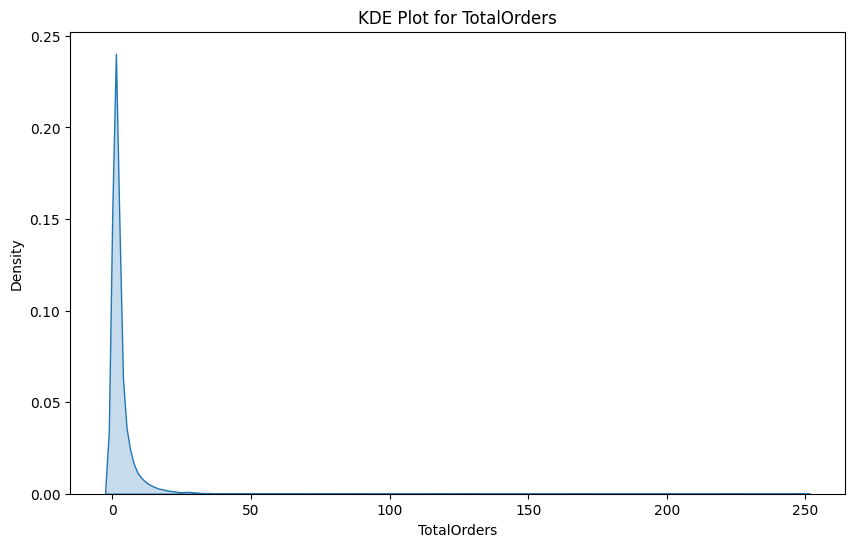

KDE Plot Analysis for TotalOrders:
Skewness Value: 14.395186158420573
Skewness Type: Right Skewed
The Mean Value is 3.204652313783717




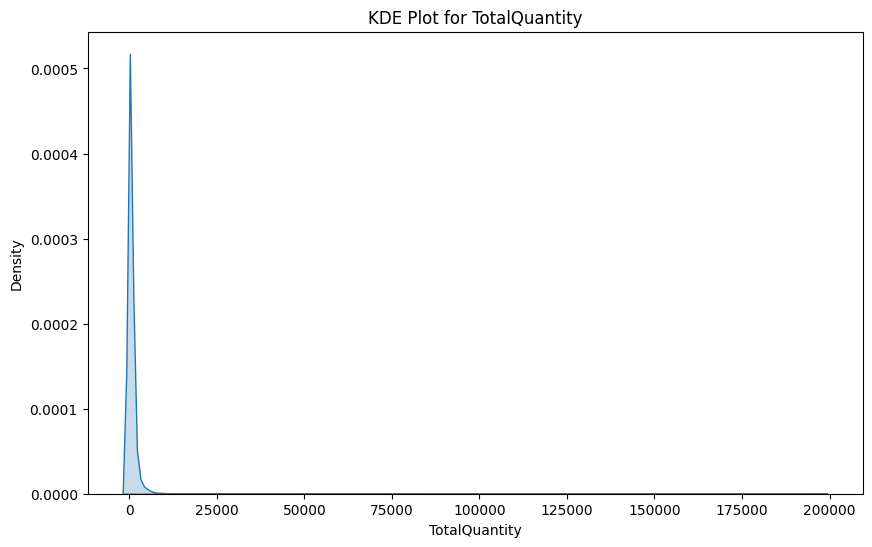

KDE Plot Analysis for TotalQuantity:
Skewness Value: 27.016197217190264
Skewness Type: Right Skewed
The Mean Value is 724.0377381836179




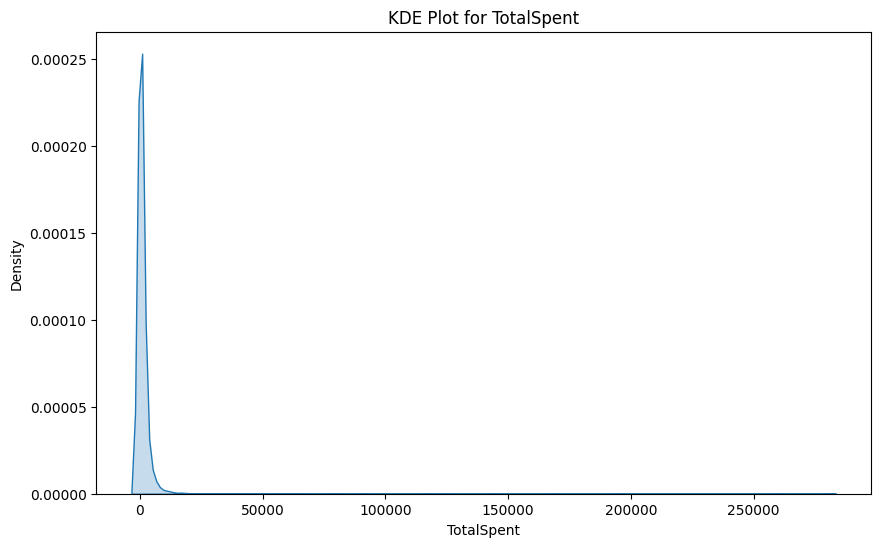

KDE Plot Analysis for TotalSpent:
Skewness Value: 25.020379600887495
Skewness Type: Right Skewed
The Mean Value is 1319.436163573373




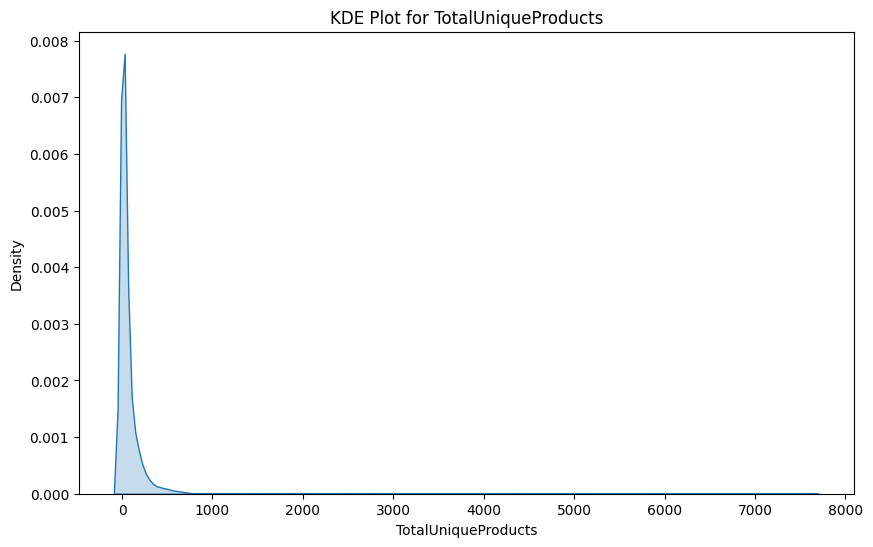

KDE Plot Analysis for TotalUniqueProducts:
Skewness Value: 19.64713569657087
Skewness Type: Right Skewed
The Mean Value is 65.72939866369711




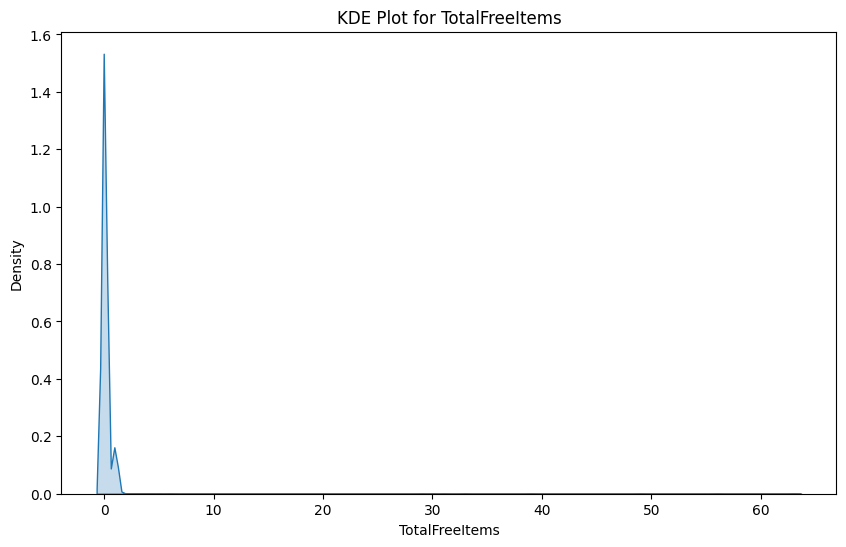

KDE Plot Analysis for TotalFreeItems:
Skewness Value: 32.883972705854106
Skewness Type: Right Skewed
The Mean Value is 0.14526107399158625




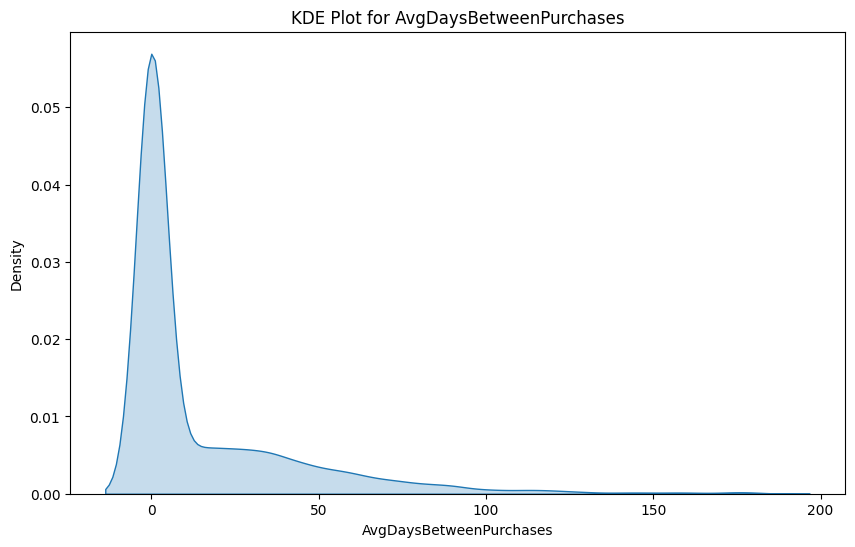

KDE Plot Analysis for AvgDaysBetweenPurchases:
Skewness Value: 2.4380614942828807
Skewness Type: Right Skewed
The Mean Value is 15.110919963750698




In [ ]:
from scipy.stats import skew


cols = ['TotalOrders', 'TotalQuantity', 'TotalSpent', 'TotalUniqueProducts','TotalFreeItems','AvgDaysBetweenPurchases']

# Plotting KDE and analyzing skewness
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=customer_df, x=col, fill=True)
    plt.title(f'KDE Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

    # Calculating skewness
    column_skewness = skew(customer_df[col])

    # Determining skewness type
    if column_skewness > 0:
        skew_type = 'Right Skewed'
    elif column_skewness < 0:
        skew_type = 'Left Skewed'
    else:
        skew_type = 'Normal'

    # Finding the Mean
    mean = customer_df[col].mean()

    # Printing skewness value, skewness type, and median
    print(f"KDE Plot Analysis for {col}:")
    print(f"Skewness Value: {column_skewness}")
    print(f"Skewness Type: {skew_type}")
    print(f"The Mean Value is {mean}")
    print("\n")

Checking for outliers

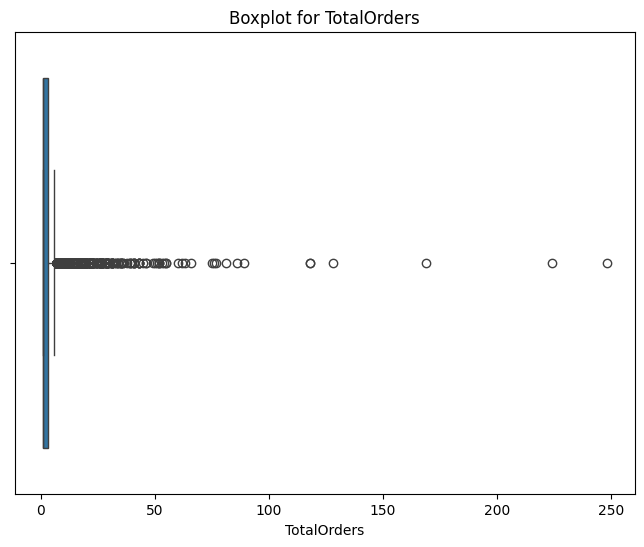

There are 891 outliers in the 'TotalOrders' column (11.02%)

----------------------------------------------------------------------


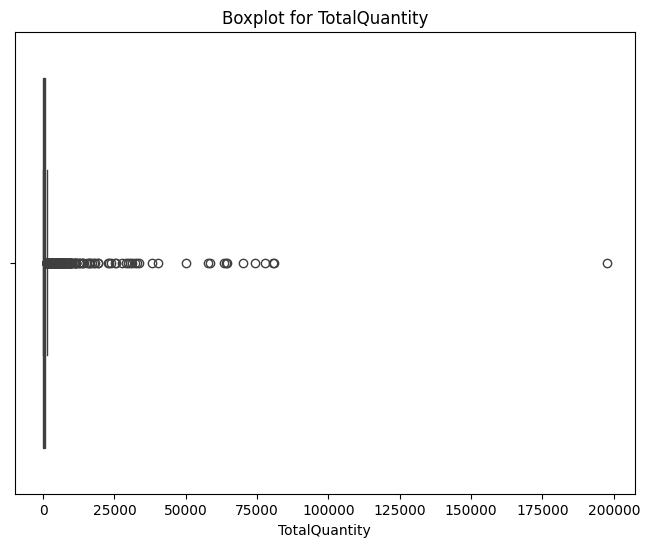

There are 890 outliers in the 'TotalQuantity' column (11.01%)

----------------------------------------------------------------------


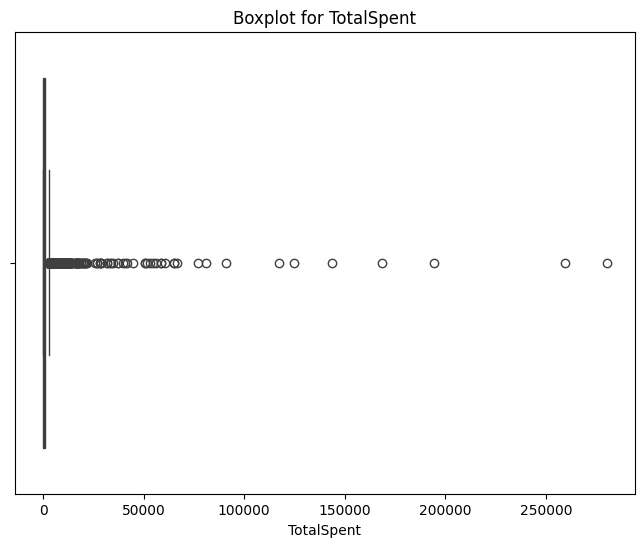

There are 776 outliers in the 'TotalSpent' column (9.60%)

----------------------------------------------------------------------


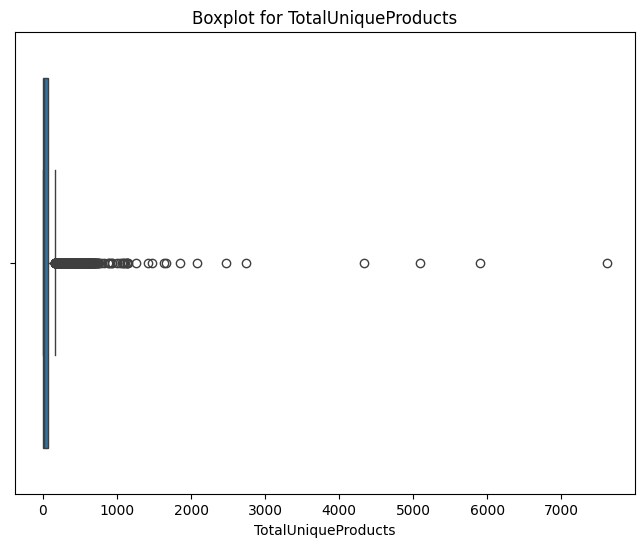

There are 863 outliers in the 'TotalUniqueProducts' column (10.68%)

----------------------------------------------------------------------


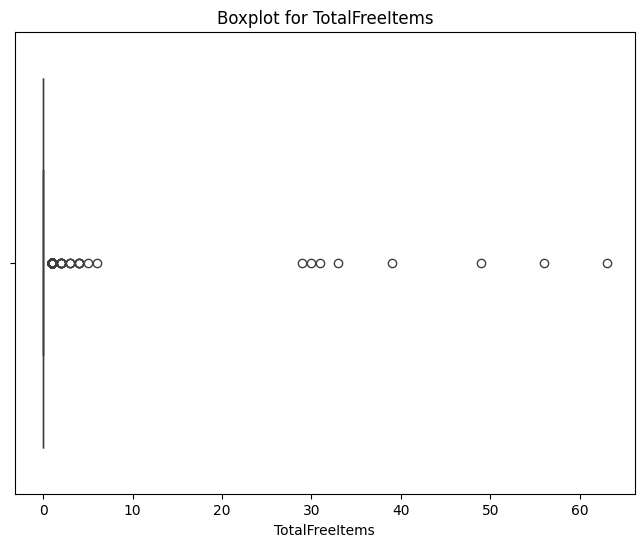

There are 816 outliers in the 'TotalFreeItems' column (10.10%)

----------------------------------------------------------------------


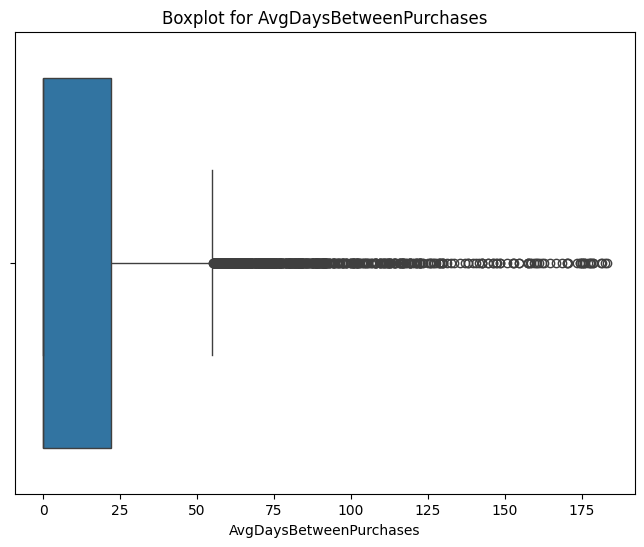

There are 756 outliers in the 'AvgDaysBetweenPurchases' column (9.35%)

----------------------------------------------------------------------
Summary of Outliers:
                    Column Outlier Count  Outlier Percentage
0              TotalOrders           891           11.024499
1            TotalQuantity           890           11.012126
2               TotalSpent           776            9.601584
3      TotalUniqueProducts           863           10.678050
4           TotalFreeItems           816           10.096511
5  AvgDaysBetweenPurchases           756            9.354120


In [ ]:
cols = ['TotalOrders', 'TotalQuantity', 'TotalSpent', 'TotalUniqueProducts', 'TotalFreeItems', 'AvgDaysBetweenPurchases']

# Initialize an empty DataFrame to store outlier details
df_outliers = pd.DataFrame(columns=['Column', 'Outlier Count', 'Outlier Percentage'])

# Checking for outliers in each numerical column
for col in cols:
    # Boxplot for each column
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=customer_df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

    # Computing IQR for each column
    q1 = np.percentile(customer_df[col], 25)
    q3 = np.percentile(customer_df[col], 75)
    IQR = q3 - q1
    upper_limit = q3 + (1.5 * IQR)
    lower_limit = q1 - (1.5 * IQR)

    # The values less than the lower limit and the values greater than the upper limit are considered outliers
    outliers_of_col = customer_df[(customer_df[col] < lower_limit) | (customer_df[col] > upper_limit)]
    k = len(outliers_of_col)
    total_count = len(customer_df)

    # Creating a DataFrame with outlier information for this column
    outlier_info = pd.DataFrame({
        'Column': [col],
        'Outlier Count': [k],
        'Outlier Percentage': [(k / total_count) * 100]
    })

    # Concatenating the current outlier info with the overall DataFrame
    df_outliers = pd.concat([df_outliers, outlier_info], ignore_index=True)

    # Print outlier information for the current column
    print(f"There are {k} outliers in the '{col}' column ({outlier_info['Outlier Percentage'].values[0]:.2f}%)")
    print()
    print("-------" * 10)

# Display the summary of outliers
print("Summary of Outliers:")
print(df_outliers)

Observation:
We keep the outliers as is because outliers can highlight trends, anomalies, or valuable customer segments. For instance, identifying high-value customers can be crucial for business strategy.

Returned Orders Analysis

In [ ]:
# Return Rate
100*customer_df['TotalReturnOrders'].sum()/customer_df['TotalOrders'].sum()

5.158301158301159

Observation: The return rate stands at approximately 5.16%, indicating that around 5% of total orders are returned, which highlights the need for addressing factors contributing to returns.

In [ ]:
# Statistical Summary of returned orders
return_summary = customer_df[['TotalReturnOrders', 'TotalReturnedQty']].describe()
return_summary

,TotalReturnOrders,TotalReturnedQty
count,8082.000000,8082.000000
mean,0.165306,25.607152
std,0.371479,245.938975
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,9600.000000


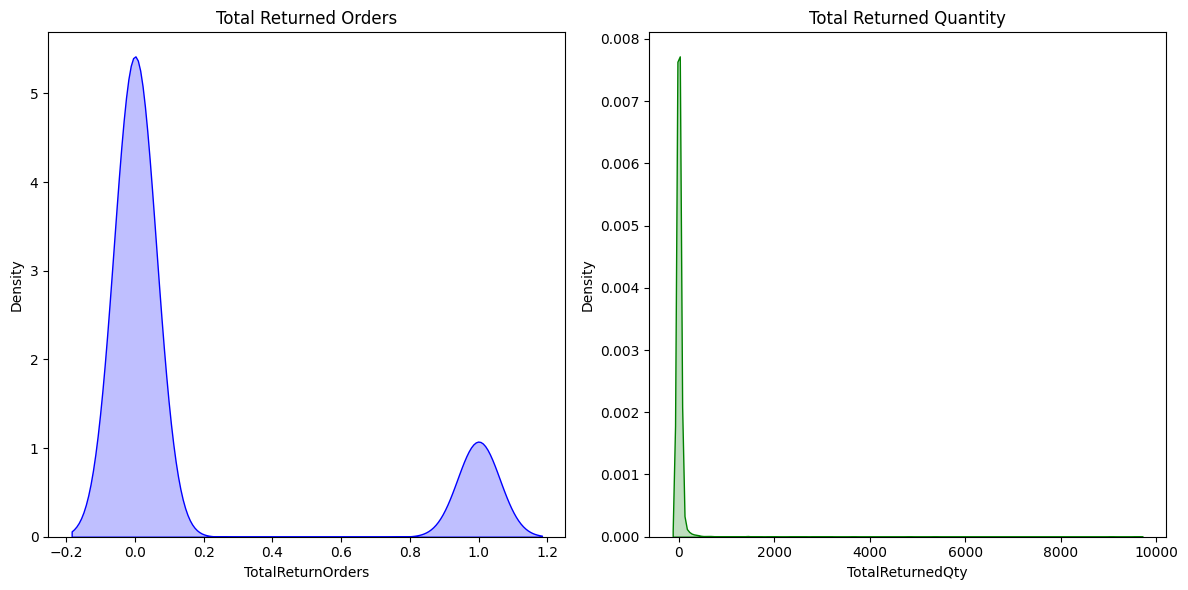

In [ ]:
# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Plot kdeplots for TotalReturnedOrders and TotalReturnedQty
plt.subplot(1, 2, 1)
sns.kdeplot(customer_df['TotalReturnOrders'], color='blue', fill=True)
plt.title('Total Returned Orders')

plt.subplot(1, 2, 2)
sns.kdeplot(customer_df['TotalReturnedQty'], color='green', fill=True)
plt.title('Total Returned Quantity')

plt.tight_layout()
plt.show()

Observations:
* The mean of TotalReturnOrders is 0.17, indicating that a minority of customers typically return orders.

* The mean of TotalReturnedQty is 25.61, suggesting that when returns occur, they can involve a significant quantity of items, reflecting the potential for considerable inventory and financial implications.

Cancelled Orders Analysis

In [ ]:
# Cancellation Rate
100*customer_df['TotalCancelledOrders'].sum()/customer_df['TotalOrders'].sum()

14.81081081081081

Observation: The cancellation rate stands at approximately 14.81%, indicating that about 15% of total orders are canceled, highlighting the need to investigate the reasons for cancellations

In [ ]:
# Statistical Summary of cancelled orders
cancel_summary = customer_df[['TotalCancelledOrders', 'TotalCancelledQty', 'TotalCancelledAmt']].describe()
cancel_summary

,TotalCancelledOrders,TotalCancelledQty,TotalCancelledAmt
count,8082.000000,8082.000000,8082.000000
mean,0.474635,34.095521,110.613676
std,1.626842,1237.485753,2234.398581
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,47.000000,80995.000000,168469.600000


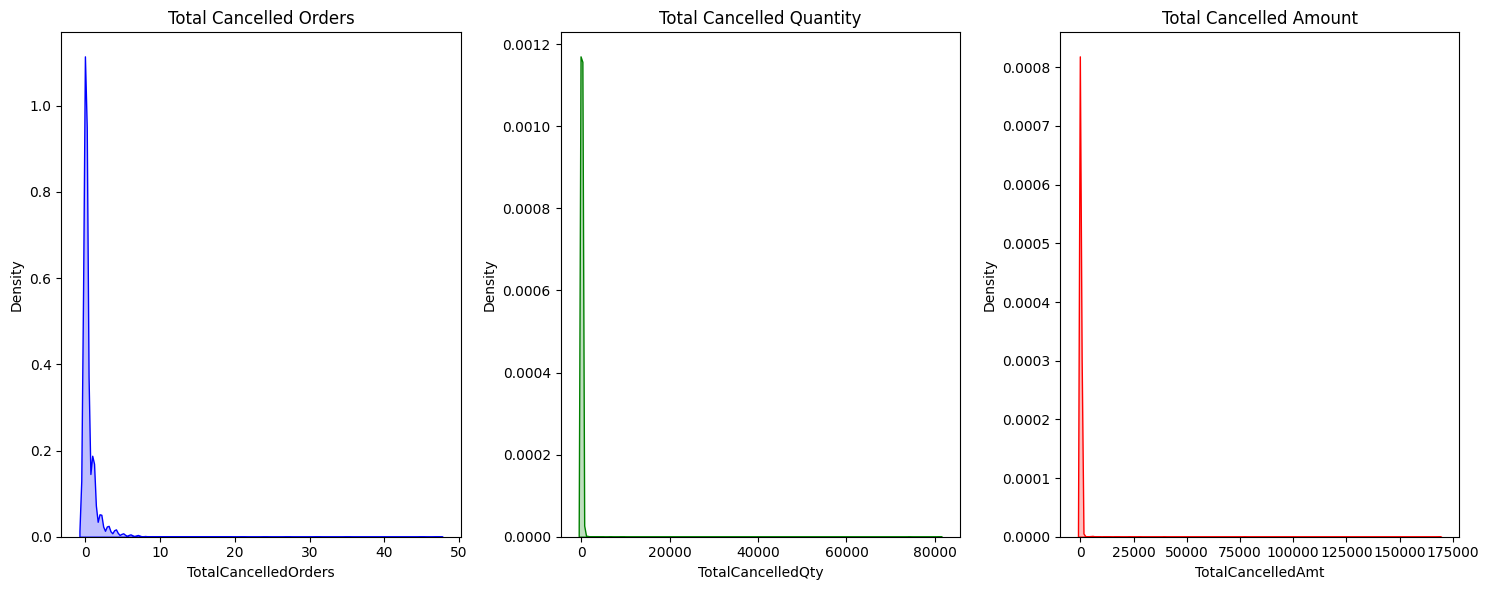

In [ ]:
# Set the figure size for better visibility
plt.figure(figsize=(15, 6))

# Plot kdeplots for TotalCancelledOrders, TotalCancelledQty, and TotalCancelledAmt
plt.subplot(1, 3, 1)
sns.kdeplot(customer_df['TotalCancelledOrders'], color='blue', fill=True)
plt.title('Total Cancelled Orders')

plt.subplot(1, 3, 2)
sns.kdeplot(customer_df['TotalCancelledQty'], color='green', fill=True)
plt.title('Total Cancelled Quantity')

plt.subplot(1, 3, 3)
sns.kdeplot(customer_df['TotalCancelledAmt'], color='red', fill=True)
plt.title('Total Cancelled Amount')

plt.tight_layout()
plt.show()

Observations:
* The mean of TotalCancelledOrders is 0.47, indicating that most customers do not cancel orders.

* The mean of TotalCancelledQty is 34.10, suggesting that when cancellations occur, they often involve a substantial number of items.

* The mean of TotalCancelledAmt is 110.61, reflecting that order cancellations can lead to a significant financial impact on the business

### Key Metrics

In [ ]:
# Calculate total revenue
total_revenue = customer_df['TotalSpent'].sum()

# Calculate total orders
total_orders = customer_df['TotalOrders'].sum()- customer_df['TotalCancelledOrders'].sum()

# Calculate total quantity sold
total_quantity = customer_df['TotalQuantity'].sum()

# Calculate average revenue per order
avg_revenue_per_order = total_revenue / total_orders

# Calculate total products sold (unique products)
total_products = df_replaced['StockCode'].nunique()

# Calculate average revenue per product
avg_revenue_per_product = total_revenue / total_products

# Create a summary of the key metrics
key_metrics = {
    'Total Revenue': total_revenue,
    'Total Orders': total_orders,
    'Total Quantity': total_quantity,
    'Average Revenue per Order': avg_revenue_per_order,
    'Total Products': total_products,
    'Average Revenue per Product': avg_revenue_per_product
}


for metric, value in key_metrics.items():
    print(f"{metric}: {value}")

Total Revenue: 10663683.074000001
Total Orders: 22064
Total Quantity: 5851673
Average Revenue per Order: 483.3068833393764
Total Products: 4070
Average Revenue per Product: 2620.0695513513515


In [ ]:
customer_df

,CustomerID,TotalOrders,TotalQuantity,TotalSpent,TotalUniqueProducts,TotalFreeItems,TotalReturnedQty,TotalReturnOrders,TotalCancelledOrders,TotalCancelledQty,TotalCancelledAmt,Country,LastPurchaseDate,AvgDaysBetweenPurchases
0,12346.0,2,74215,77183.60,2,0,0,0,1,74215,77183.6,United Kingdom,2011-01-18 10:17:00,0.000000
1,12347.0,7,2458,4310.00,182,0,0,0,0,0,0.0,Iceland,2011-12-07 15:52:00,52.142857
2,12348.0,4,2341,1797.24,27,0,0,0,0,0,0.0,Finland,2011-09-25 13:13:00,70.750000
3,12349.0,1,631,1757.55,73,0,0,0,0,0,0.0,Italy,2011-11-21 09:51:00,0.000000
4,12350.0,1,197,334.40,17,0,0,0,0,0,0.0,Norway,2011-02-02 16:01:00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,Unknown Customer 995,1,53,0.00,1,0,53,1,0,0,0.0,United Kingdom,2011-03-29 16:56:00,0.000000
8078,Unknown Customer 996,1,25,0.00,1,1,0,0,0,0,0.0,United Kingdom,2011-03-29 17:11:00,0.000000
8079,Unknown Customer 997,1,30,0.00,1,0,30,1,0,0,0.0,United Kingdom,2011-03-29 17:21:00,0.000000
8080,Unknown Customer 998,1,5,13.77,2,0,0,0,0,0,0.0,United Kingdom,2011-03-30 09:46:00,0.000000


In [ ]:
# Percentage of Customers Contributing to 80% of Total Revenue
customer_revenue_df = customer_df[['CustomerID', 'TotalSpent']].copy()

# Sorting customers by total spent in descending order
customer_revenue_df = customer_revenue_df.sort_values(by='TotalSpent', ascending=False)

# Calculating cumulative revenue and percentage
total_revenue = customer_revenue_df['TotalSpent'].sum()
customer_revenue_df['CumulativeRevenue'] = customer_revenue_df['TotalSpent'].cumsum()
customer_revenue_df['CumulativePercentage'] = (customer_revenue_df['CumulativeRevenue'] / total_revenue) * 100

# Identifying the number of customers contributing to 80% of total revenue
customers_80_percent = customer_revenue_df[customer_revenue_df['CumulativePercentage'] <= 80]
number_of_customers_80_percent = customers_80_percent['CustomerID'].nunique()

# Calculating total number of customers and percentage of customers contributing to 80% revenue
total_customers = customer_revenue_df['CustomerID'].nunique()
percentage_of_customers_80_percent = (number_of_customers_80_percent / total_customers) * 100

print(f"Percentage of customers contributing to 80% of total revenue: {percentage_of_customers_80_percent:.2f}%")



Percentage of customers contributing to 80% of total revenue: 18.79%


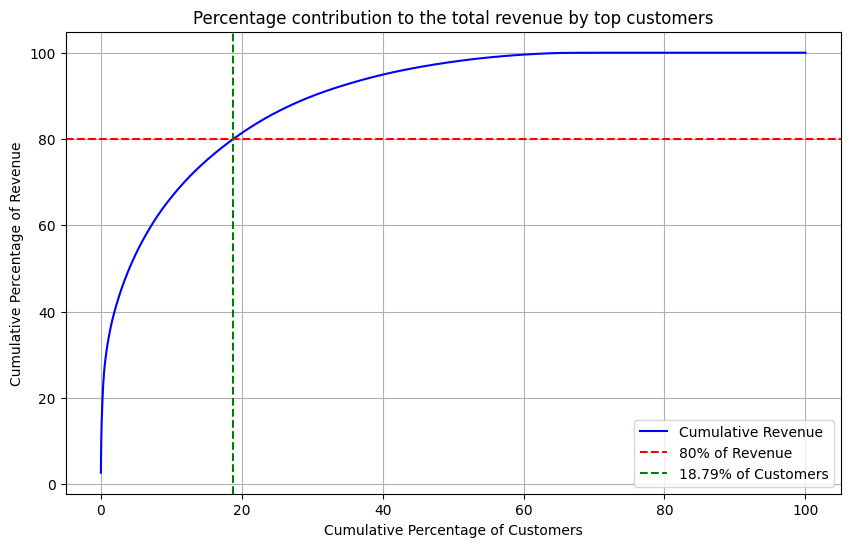

In [ ]:
# Reset index for proper ranking
customer_revenue_df = customer_revenue_df.reset_index(drop=True)

# Create a new column for cumulative percentage of customers
customer_revenue_df['CumulativeCustomerPercentage'] = (customer_revenue_df.index + 1) / total_customers * 100

# Plotting the cumulative percentage of customers vs. cumulative percentage of revenue
plt.figure(figsize=(10, 6))
plt.plot(customer_revenue_df['CumulativeCustomerPercentage'], customer_revenue_df['CumulativePercentage'], label='Cumulative Revenue', color='blue')

# Adding vertical and horizontal lines for the 80% revenue mark
plt.axhline(y=80, color='red', linestyle='--', label='80% of Revenue')
plt.axvline(x=percentage_of_customers_80_percent, color='green', linestyle='--', label=f'{percentage_of_customers_80_percent:.2f}% of Customers')

# Adding titles and labels
plt.title('Percentage contribution to the total revenue by top customers')
plt.xlabel('Cumulative Percentage of Customers')
plt.ylabel('Cumulative Percentage of Revenue')
plt.legend()
plt.grid(True)
plt.savefig('80-20 revenue.png',dpi=300)
plt.show()


Observation: This graph highlights how a relatively small group of top-spending customers accounts for the majority of the overall revenue

Weekday vs Weekend Analysis

In [ ]:
# Creating a DataFrame with valid orders (non-cancelled)
cols = ['CustomerID', 'InvoiceNo', 'TotalSpent', 'InvoiceDate']
weekdf = customer_invoice_level_df[customer_invoice_level_df['is_cancelled'] == 'No'][cols]

# Extracting day names from the 'InvoiceDate' column
weekdf['DayName'] = weekdf['InvoiceDate'].dt.day_name()

# Creating 'is_weekend' column: 'Yes' for Saturday or Sunday, otherwise 'No'
weekdf['is_weekend'] = weekdf['DayName'].apply(lambda x: 'Yes' if x in ['Saturday', 'Sunday'] else 'No')


weekdf

,CustomerID,InvoiceNo,TotalSpent,InvoiceDate,DayName,is_weekend
0,12346.0,541431,77183.60,2011-01-18 10:01:00,Tuesday,No
2,12347.0,537626,711.79,2010-12-07 14:57:00,Tuesday,No
3,12347.0,542237,475.39,2011-01-26 14:30:00,Wednesday,No
4,12347.0,549222,636.25,2011-04-07 10:43:00,Thursday,No
5,12347.0,556201,382.52,2011-06-09 13:01:00,Thursday,No
...,...,...,...,...,...,...
25895,Unknown Customer 995,548206,0.00,2011-03-29 16:56:00,Tuesday,No
25896,Unknown Customer 996,548207,0.00,2011-03-29 17:11:00,Tuesday,No
25897,Unknown Customer 997,548209,0.00,2011-03-29 17:21:00,Tuesday,No
25898,Unknown Customer 998,548219,13.77,2011-03-30 09:46:00,Wednesday,No


In [ ]:
# Grouping by 'DayName' to calculate total revenue and number of orders
dayname_grouped_df = weekdf.groupby('DayName').agg(
    TotalRevenue=('TotalSpent', 'sum'),            # Summing total spent for each day
    NumberOfOrders=('InvoiceNo', 'nunique')        # Counting unique orders (InvoiceNo) for each day
).reset_index()

# Creating 'AvgRevenuePerOrder' by dividing TotalRevenue by NumberOfOrders
dayname_grouped_df['AvgRevenuePerOrder'] = dayname_grouped_df['TotalRevenue'] / dayname_grouped_df['NumberOfOrders']
dayname_grouped_df=dayname_grouped_df.sort_values(by='TotalRevenue',ascending=False)
dayname_grouped_df

,DayName,TotalRevenue,NumberOfOrders,AvgRevenuePerOrder
3,Thursday,2199292.570,4689,469.032325
4,Tuesday,2175700.511,3973,547.621573
5,Wednesday,1846537.380,4142,445.808155
0,Friday,1815346.371,3633,499.682458
1,Monday,1775782.071,3420,519.234524
2,Sunday,806775.931,2207,365.553208


We can see that there are no orders on Saturday

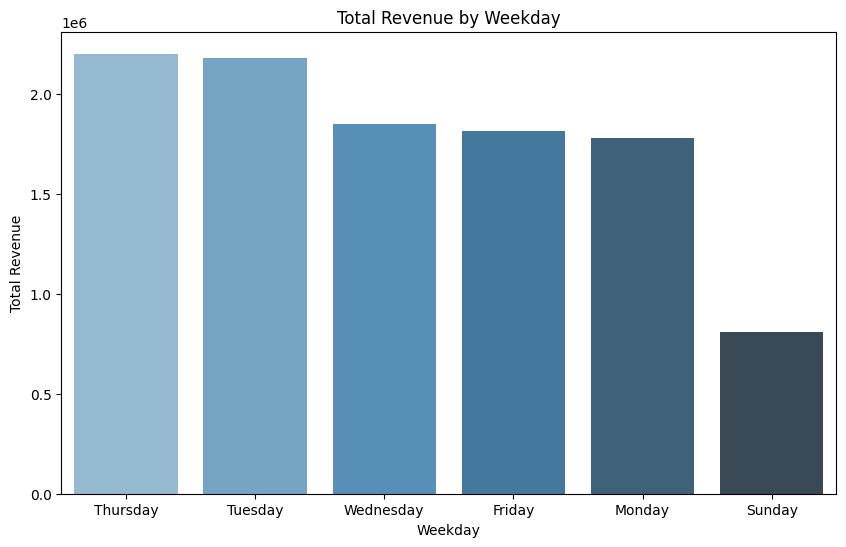

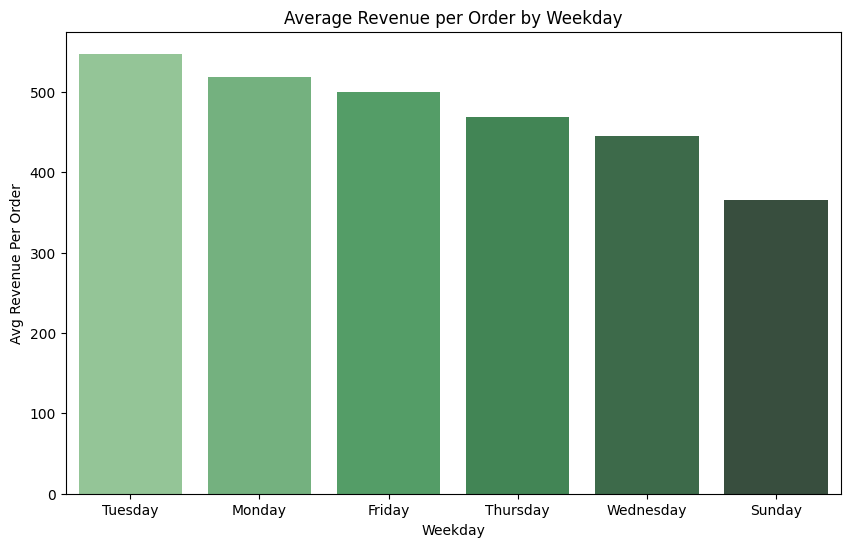

In [ ]:
# Sorting by Total Revenue in descending order
dayname_grouped_df_sorted_by_revenue = dayname_grouped_df.sort_values(by='TotalRevenue', ascending=False)

# Plot 1: Weekday vs Total Revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=dayname_grouped_df_sorted_by_revenue, x='DayName', y='TotalRevenue', palette='Blues_d')
plt.title('Total Revenue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Revenue')

plt.savefig('weekday_total_revenue.png',dpi=300)
plt.show()

print()
# Sorting by Avg Revenue Per Order in descending order
dayname_grouped_df_sorted_by_avg = dayname_grouped_df.sort_values(by='AvgRevenuePerOrder', ascending=False)

# Plot 2: Weekday vs Avg Revenue Per Order
plt.figure(figsize=(10, 6))
sns.barplot(data=dayname_grouped_df_sorted_by_avg, x='DayName', y='AvgRevenuePerOrder', palette='Greens_d')
plt.title('Average Revenue per Order by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Avg Revenue Per Order')

plt.savefig('weekday_avg_revenue.png',dpi=300)
plt.show()

Observations:
* Thursday generated the highest total revenue of around 2.2 million from 4,689 orders, though the average revenue per order was relatively lower at 469.03, indicating more orders but lower value per order.
* Tuesday saw the highest average order value at 547.62, with 3,973 orders and a total revenue close to Thursday's, suggesting customers placed higher-value orders on average
* Sunday underperforms both in terms of total and average revenue, suggesting this might be a low-demand day.
* Monday and Friday are moderate, with Monday slightly leading in average order value

In [ ]:
# Grouping by is_weekend and calculating total revenue and number of orders
weekend_analysis = weekdf.groupby('is_weekend').agg(
    TotalRevenue=('TotalSpent', 'sum'),
    NumberOfOrders=('InvoiceNo', 'nunique')
).reset_index()

# Calculating average revenue per order
weekend_analysis['AvgRevenuePerOrder'] = weekend_analysis['TotalRevenue'] / weekend_analysis['NumberOfOrders']

# Displaying the dataframe
print(weekend_analysis)

  is_weekend  TotalRevenue  NumberOfOrders  AvgRevenuePerOrder
0         No   9812658.903           19857          494.166234
1        Yes    806775.931            2207          365.553208


Observation: We can clearly see that weekdays have higher number of orders and total revenue.

Revenue vs Hour of purchase

In [ ]:
# Creating a DataFrame with valid orders (non-cancelled)
cols = ['CustomerID', 'InvoiceNo', 'TotalSpent', 'InvoiceDate']
valid_orders_df = customer_invoice_level_df[customer_invoice_level_df['is_cancelled'] == 'No'][cols].copy()

# Extracting the hour from the 'InvoiceDate' column
valid_orders_df['InvoiceHour'] = valid_orders_df['InvoiceDate'].dt.hour

# Defining the function to assign time periods based on the hour
def assign_time_period(hour):
    if 0 <= hour < 7:
        return 'Dawn'
    elif 7 <= hour < 13:
        return 'Morning'
    elif 13 <= hour < 19:
        return 'Afternoon'
    else:
        return 'Night'

valid_orders_df['TimePeriod'] = valid_orders_df['InvoiceHour'].apply(assign_time_period)

In [ ]:
#  Grouping by 'TimePeriod' to calculate total revenue and number of orders
timeperiod_grouped_df = valid_orders_df.groupby('TimePeriod').agg(
    TotalRevenue=('TotalSpent', 'sum'),            # Summing total spent for each time period
    NumberOfOrders=('InvoiceNo', 'nunique')        # Counting unique orders (InvoiceNo) for each time period
).reset_index()

# Creating 'AvgRevenuePerOrder' by dividing TotalRevenue by NumberOfOrders
timeperiod_grouped_df['AvgRevenuePerOrder'] = timeperiod_grouped_df['TotalRevenue'] / timeperiod_grouped_df['NumberOfOrders']

# Sorting the DataFrame by TotalRevenue in descending order
timeperiod_grouped_df = timeperiod_grouped_df.sort_values(by='TotalRevenue', ascending=False)


timeperiod_grouped_df


,TimePeriod,TotalRevenue,NumberOfOrders,AvgRevenuePerOrder
2,Morning,5425562.752,10858,499.683436
0,Afternoon,5124830.402,11041,464.163609
3,Night,69037.430,164,420.959939
1,Dawn,4.250,1,4.250000


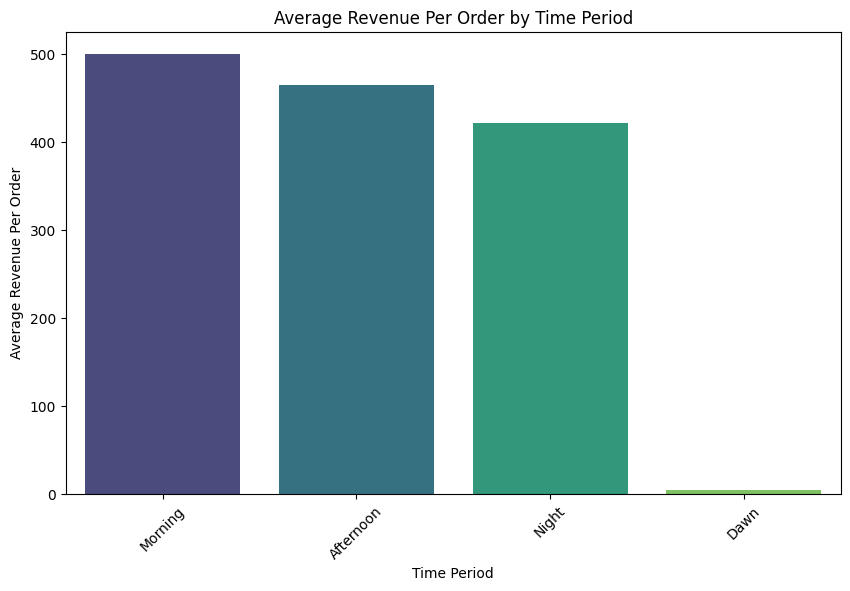

In [ ]:
# Creating a bar plot for AvgRevenuePerOrder by TimePeriod
plt.figure(figsize=(10, 6))
sns.barplot(data=timeperiod_grouped_df, x='TimePeriod', y='AvgRevenuePerOrder', palette='viridis')

plt.title('Average Revenue Per Order by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Average Revenue Per Order')
plt.xticks(rotation=45)
plt.savefig('time_avg_revenue.png',dpi=300)
plt.show()

Observations:
* Morning generated the highest total revenue of approximately 5.43 million from 10,858 orders, with an average revenue per order of 499.68, indicating strong customer spending during this time.
* Afternoon followed closely, bringing in around 5.12 million from 11,041 orders, but with a slightly lower average revenue per order of 464.16.
* Night saw significantly lower revenue at 69,037 from just 164 orders, with an average revenue per order of 420.96, reflecting low customer activity.
* Dawn contributed only 4.25 from a single order, indicating minimal spending during these early hours

# Customer Segmentation

In [ ]:
customer_df['LastPurchaseDate'] = pd.to_datetime(customer_df['LastPurchaseDate'])

# Calculating Recency
max_date = customer_df['LastPurchaseDate'].max()
customer_df['Recency'] = (max_date - customer_df['LastPurchaseDate']).dt.days

# Frequency is already available as TotalOrders-TotalCancelledOrders
customer_df['Frequency'] = customer_df['TotalOrders']- customer_df['TotalCancelledOrders']

# Monetary is already available as TotalSpent
customer_df['Monetary'] = customer_df['TotalSpent']

# Selecting relevant columns for RFM analysis
rfm = customer_df[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
8077,Unknown Customer 995,254,1,0.00
8078,Unknown Customer 996,254,1,0.00
8079,Unknown Customer 997,254,1,0.00
8080,Unknown Customer 998,254,1,13.77


In [ ]:
# Defining scoring criteria for each RFM value
recency_scores=[5,4,3,2,1] # Higher score for more recent
frequency_scores=[1,2,3,4,5] # Higher score for higher frequency
monetary_scores=[1,2,3,4,5] # Higher score for higher monetary value

# Calculating RFM Scores
rfm["R_Score"]=pd.cut(rfm['Recency'],bins=5,labels=recency_scores)
rfm["F_Score"]=pd.cut(rfm['Frequency'],bins=5,labels=frequency_scores)
rfm["M_Score"]=pd.cut(rfm['Monetary'],bins=5,labels=monetary_scores)

rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,325,1,77183.60,1,1,2
1,12347.0,1,7,4310.00,5,1,1
2,12348.0,74,4,1797.24,5,1,1
3,12349.0,18,1,1757.55,5,1,1
4,12350.0,309,1,334.40,1,1,1
...,...,...,...,...,...,...,...
8077,Unknown Customer 995,254,1,0.00,2,1,1
8078,Unknown Customer 996,254,1,0.00,2,1,1
8079,Unknown Customer 997,254,1,0.00,2,1,1
8080,Unknown Customer 998,254,1,13.77,2,1,1


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  8082 non-null   object  
 1   Recency     8082 non-null   int64   
 2   Frequency   8082 non-null   int64   
 3   Monetary    8082 non-null   float64 
 4   R_Score     8082 non-null   category
 5   F_Score     8082 non-null   category
 6   M_Score     8082 non-null   category
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 277.0+ KB


In [ ]:
# Converting RFM Scores to numeric types
rfm['R_Score']=rfm['R_Score'].astype('int')
rfm['F_Score']=rfm['F_Score'].astype('int')
rfm['M_Score']=rfm['M_Score'].astype('int')

In [ ]:
# Calculating the final RFM score by combining the individual scores
rfm['RFM_Score']=rfm['R_Score']+rfm['F_Score']+rfm['M_Score']

# Creating RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
rfm['Value Segment'] = pd.qcut(rfm['RFM_Score'], q=3, labels=segment_labels)

In [ ]:
rfm.head(20)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Value Segment
0,12346.0,325,1,77183.60,1,1,2,4,Low-Value
1,12347.0,1,7,4310.00,5,1,1,7,Mid-Value
2,12348.0,74,4,1797.24,5,1,1,7,Mid-Value
3,12349.0,18,1,1757.55,5,1,1,7,Mid-Value
4,12350.0,309,1,334.40,1,1,1,3,Low-Value
5,12352.0,35,8,2506.04,5,1,1,7,Mid-Value
6,12353.0,203,1,89.00,3,1,1,5,Low-Value
7,12354.0,231,1,1079.40,2,1,1,4,Low-Value
8,12355.0,213,1,459.40,3,1,1,5,Low-Value
9,12356.0,22,3,2811.43,5,1,1,7,Mid-Value


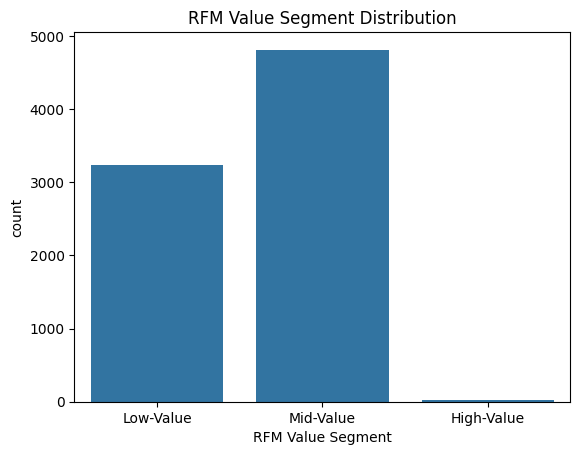

,proportion
Value Segment,
Mid-Value,59.539718
Low-Value,40.113833
High-Value,0.346449


In [ ]:
# RFM Value Segment Distribution
sns.countplot(data=rfm,x='Value Segment')
plt.title('RFM Value Segment Distribution')
plt.xlabel('RFM Value Segment')
plt.show()

rfm['Value Segment'].value_counts(normalize=True)*100

RFM Value Segment Distribution Insights


Dominance of Mid-Value Segment:

* Proportion: 59.54% of customers fall into the Mid-Value segment.
* Insight: This indicates that a significant majority of the customers are contributing to the business but are not yet at the highest spending or engagement level. This group may have the potential for growth if targeted appropriately. Strategies to increase their frequency of purchases or average spending could be beneficial, such as personalized marketing campaigns or loyalty programs.



Significant Low-Value Segment:

* Proportion: 40.11% of customers are classified as Low-Value.
* Insight: A substantial portion of the customer base is not contributing significantly to revenue. Understanding the reasons behind this classification is crucial. These customers may need targeted re-engagement efforts, special promotions, or improved customer experience to encourage repeat purchases.



Minimal High-Value Segment:

* Proportion: Only 0.34% of customers are categorized as High-Value.
* Insight: The low percentage of high-value customers indicates that the business may rely heavily on a small group for its revenue. Fostering relationships with these customers through personalized communication and exclusive offers can encourage loyalty and repeat purchases. Additionally, identifying the characteristics that define these high-value customers could help in attracting more customers who fit this profile.

In [ ]:
# Creating RFM Customer Segments that are broader classifications based on the RFM scores.

def segment(rfm_score):

    """
    This function classifies the customers into segments
    such as Champions, Potential Loyalists,At Risk Customers etc
    based on the RFM Score

    """
    if rfm_score>=9:
        return 'Champions'
    elif rfm_score>=6 and rfm_score<9:
        return 'Potential Loyalists'
    elif rfm_score==5:
        return 'At Risk Customers'
    elif rfm_score==4:
        return 'Cannot Lose'
    elif rfm_score<4:
        return 'Lost'

rfm['Customer Segments']=rfm['RFM_Score'].apply(segment)

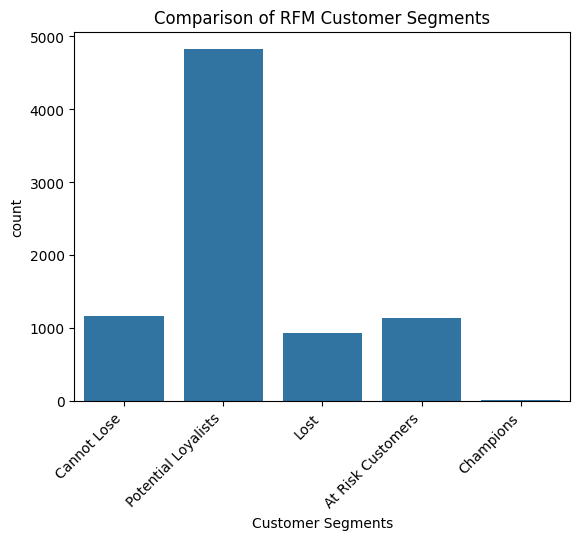

In [ ]:
sns.countplot(data=rfm,x='Customer Segments')
plt.xticks(rotation=45,ha='right')
plt.title('Comparison of RFM Customer Segments')
plt.show()

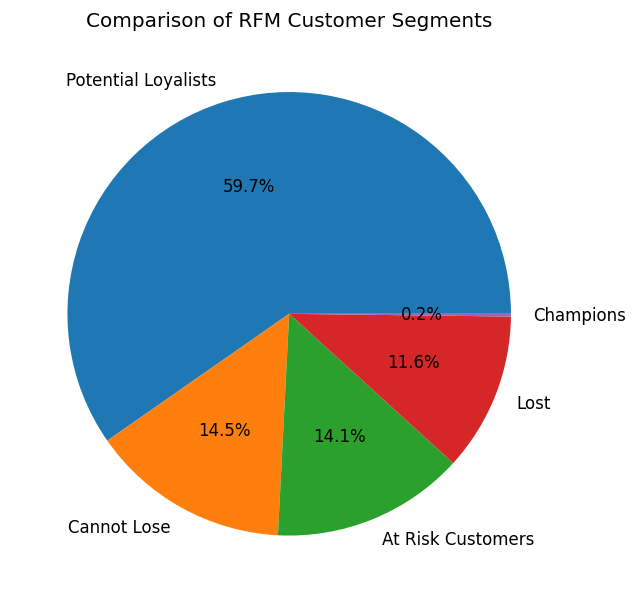

In [ ]:
rfm_segment_counts=rfm['Customer Segments'].value_counts()
plt.figure(figsize=(6,6),dpi=120)
plt.pie(rfm_segment_counts,labels=rfm_segment_counts.index,autopct='%1.1f%%')
plt.title("Comparison of RFM Customer Segments")
plt.show()

Insights
* High Proportion of Potential Loyalists (59.7%):

This segment represents a significant opportunity for the company. These customers have shown some engagement but may not yet be fully loyal. They could be encouraged to increase their purchase frequency or spending through targeted marketing strategies.

* Low Percentage of Champions (0.2%):

The extremely low percentage of 'Champions' suggests that very few customers are highly engaged and consistently purchasing. This indicates a need to identify what makes these customers loyal and to replicate those factors for others.

* Lost Customers (11.6%):

Having over 11% of customers classified as 'Lost' indicates a substantial issue. This group requires attention to understand why they have stopped purchasing.

* At Risk and Cannot Lose Customers (28.6%):

The combined percentage of customers at risk (14.1%) and those categorized as 'Cannot Lose' (14.5%) suggests that the company is on the verge of losing nearly a third of its customer base. This is a critical area for intervention.

Action Points

* Targeted Campaigns for Potential Loyalists:

Implement loyalty programs or exclusive offers to encourage these customers to transition into 'Champions'. Personalized marketing campaigns could help reinforce their loyalty and increase their frequency of purchase.

* Analyze Champions:

Investigate the characteristics and purchasing behavior of 'Champions' to understand what drives their loyalty. Use this information to create similar experiences or incentives for 'Potential Loyalists' and 'At Risk' customers.

* Reactivation Strategies for Lost Customers:

Develop re-engagement strategies, such as special promotions or surveys to understand their reasons for leaving. This could involve personalized outreach, offering discounts, or showcasing new products.

* Retention Strategies for At Risk and Cannot Lose Customers:

Design retention strategies focused on 'At Risk' customers, perhaps through personalized communication or loyalty incentives. For 'Cannot Lose' customers, ensure that they feel valued and appreciated through consistent engagement

In [ ]:
# Distribution of customers across different customer segments within each value segment
rfm.groupby(['Value Segment', 'Customer Segments']).size()

Value Segment  Customer Segments  
Low-Value      At Risk Customers      1136
               Cannot Lose            1172
               Champions                 0
               Lost                    934
               Potential Loyalists       0
Mid-Value      At Risk Customers         0
               Cannot Lose               0
               Champions                 0
               Lost                      0
               Potential Loyalists    4812
High-Value     At Risk Customers         0
               Cannot Lose               0
               Champions                16
               Lost                      0
               Potential Loyalists      12
dtype: int64

In [ ]:
# Grouping the data and calculating the size
segment_counts = rfm.groupby(['Value Segment', 'Customer Segments']).size().reset_index(name='Count')

# Calculate the total unique customers for percentage calculation
total_customers = rfm['CustomerID'].nunique()

# Calculate percentage with respect to each value segment
segment_counts['Percentage per Value Segment'] = segment_counts.groupby('Value Segment')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Calculate percentage with respect to total unique customers
segment_counts['Percentage of Total Customers'] = (segment_counts['Count'] / total_customers) * 100

# Display the results
segment_counts

,Value Segment,Customer Segments,Count,Percentage per Value Segment,Percentage of Total Customers
0,Low-Value,At Risk Customers,1136,35.040099,14.055927
1,Low-Value,Cannot Lose,1172,36.150524,14.501361
2,Low-Value,Champions,0,0.000000,0.000000
3,Low-Value,Lost,934,28.809377,11.556545
4,Low-Value,Potential Loyalists,0,0.000000,0.000000
5,Mid-Value,At Risk Customers,0,0.000000,0.000000
6,Mid-Value,Cannot Lose,0,0.000000,0.000000
7,Mid-Value,Champions,0,0.000000,0.000000
8,Mid-Value,Lost,0,0.000000,0.000000
9,Mid-Value,Potential Loyalists,4812,100.000000,59.539718


In [ ]:
# Pivot the data for a cleaner view
pivot_counts_total = segment_counts.pivot(index='Value Segment', columns='Customer Segments', values=['Percentage per Value Segment', 'Percentage of Total Customers']).fillna(0)
pivot_counts_total

Percentage per Value Segment                         \
Customer Segments            At Risk Customers Cannot Lose  Champions   
Value Segment                                                           
Low-Value                            35.040099   36.150524   0.000000   
Mid-Value                             0.000000    0.000000   0.000000   
High-Value                            0.000000    0.000000  57.142857   

                                                  \
Customer Segments       Lost Potential Loyalists   
Value Segment                                      
Low-Value          28.809377            0.000000   
Mid-Value           0.000000          100.000000   
High-Value          0.000000           42.857143   

                  Percentage of Total Customers                        \
Customer Segments             At Risk Customers Cannot Lose Champions   
Value Segment                                                           
Low-Value                             14.055927   14.501361  0.000000   
Mid-Value                              0.000000    0.000000  0.000000   
High-Value                             0.000000    0.000000  0.197971   

                                                  
Customer Segments       Lost Potential Loyalists  
Value Segment                                     
Low-Value          11.556545            0.000000  
Mid-Value           0.000000           59.539718  
High-Value          0.000000            0.148478

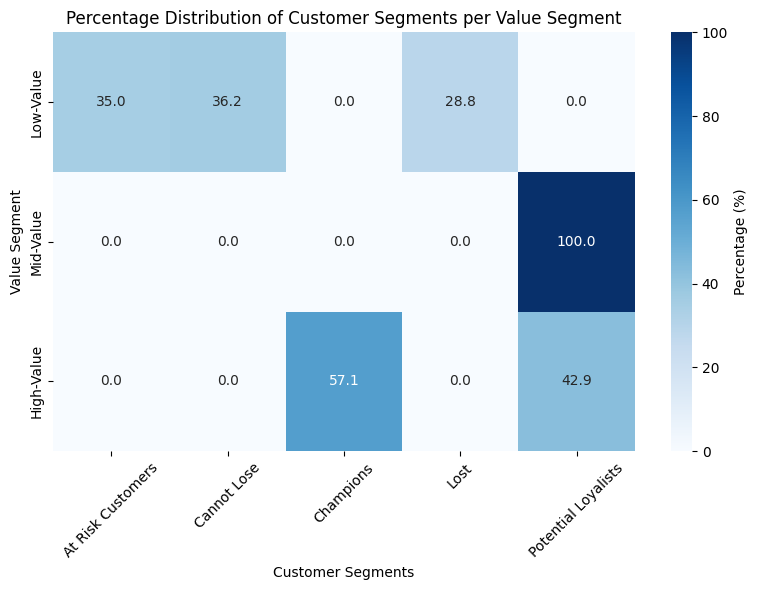

In [ ]:
# Heatmap for Percentage per Value Segment
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_counts_total['Percentage per Value Segment'], annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Percentage (%)'})
plt.title('Percentage Distribution of Customer Segments per Value Segment')
plt.ylabel('Value Segment')
plt.xlabel('Customer Segments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

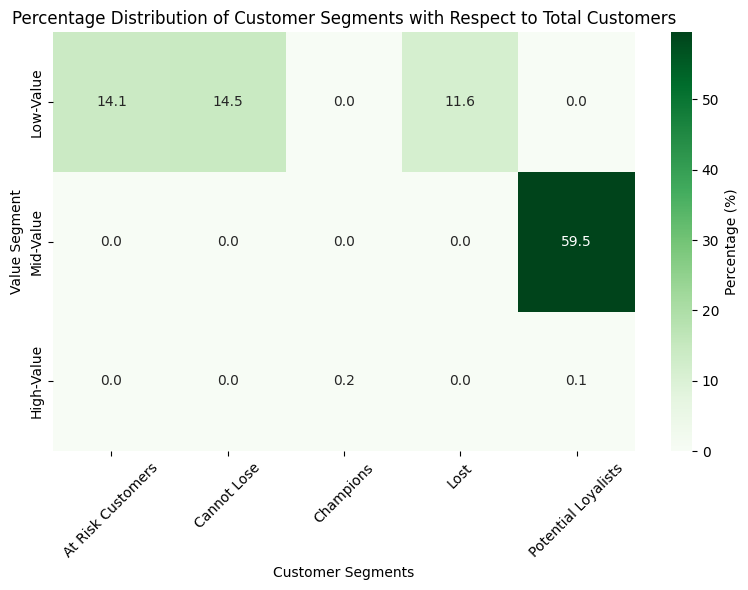

In [ ]:
# Heatmap for Percentage of Total Customers
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_counts_total['Percentage of Total Customers'], annot=True, fmt='.1f', cmap='Greens', cbar_kws={'label': 'Percentage (%)'})
plt.title('Percentage Distribution of Customer Segments with Respect to Total Customers')
plt.ylabel('Value Segment')
plt.xlabel('Customer Segments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Product and Order level Analysis

In [ ]:
# Filter out cancelled and returned orders
filtered_df = customer_invoice_level_df[
    (customer_invoice_level_df['is_cancelled'] == 'No') &
    (customer_invoice_level_df['return_order'] == 'No')
]

filtered_df['TotalSpent']=filtered_df['TotalSpent'].abs()

# Extract Year-Month from 'InvoiceDate'
filtered_df['YearMonth'] = filtered_df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and calculate metrics
monthly_analysis = filtered_df.groupby('YearMonth').agg(
    TotalRevenue=('TotalSpent', 'sum'),
    TotalOrders=('InvoiceNo', 'nunique')
).reset_index()

# Calculate Avg Revenue per Order
monthly_analysis['Avg Revenue Per Order'] = monthly_analysis['TotalRevenue'] / monthly_analysis['TotalOrders']


monthly_analysis

,YearMonth,TotalRevenue,TotalOrders,Avg Revenue Per Order
0,2010-12,821452.730,1629,504.268097
1,2011-01,689811.610,1120,615.903223
2,2011-02,522545.560,1126,464.072433
3,2011-03,716215.260,1531,467.808792
4,2011-04,536968.491,1318,407.411602
5,2011-05,769281.760,1731,444.414650
6,2011-06,760547.010,1576,482.580590
7,2011-07,718076.121,1540,466.283195
8,2011-08,779965.500,1409,553.559617
9,2011-09,1056435.192,1896,557.191557


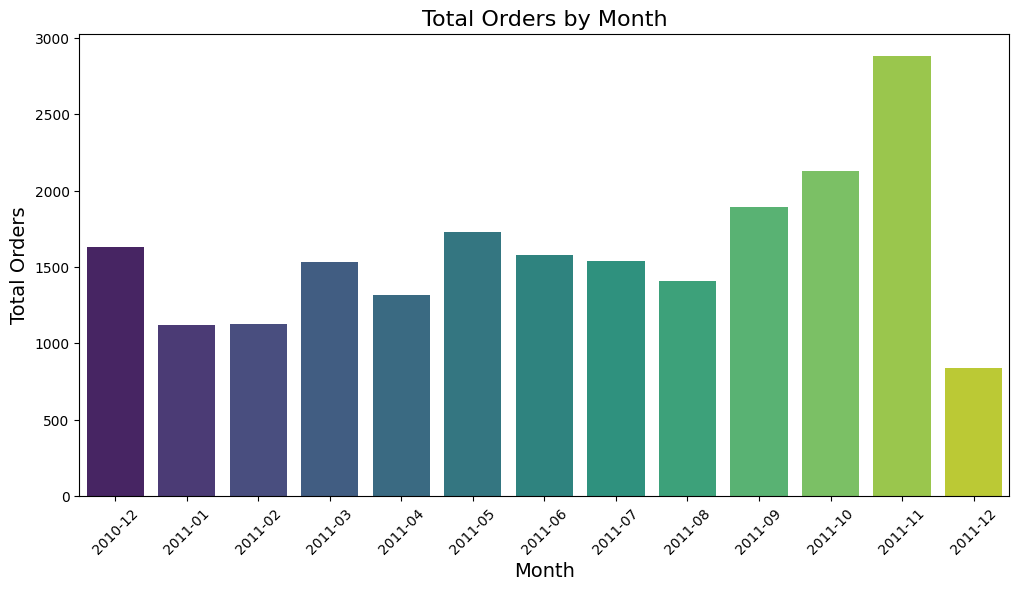

In [ ]:
# Plotting Month vs Total Orders
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_analysis, x='YearMonth', y='TotalOrders', palette='viridis')
plt.title('Total Orders by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=45)

plt.show()

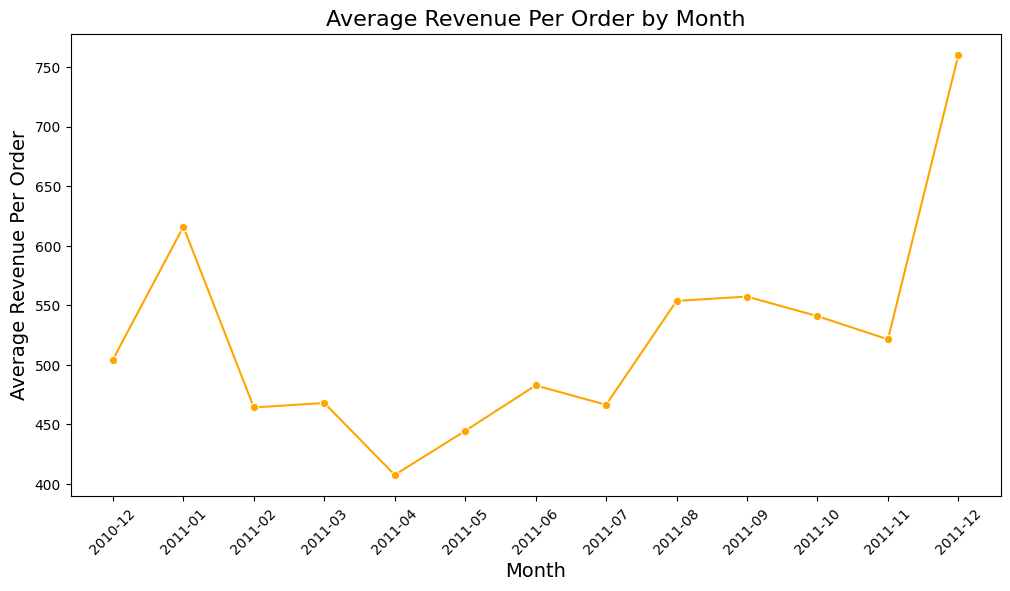

In [ ]:
# Ensure YearMonth is a string
monthly_analysis['YearMonth'] = monthly_analysis['YearMonth'].astype(str)

# Plotting Month vs Avg Revenue Per Order
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_analysis, x='YearMonth', y='Avg Revenue Per Order', marker='o', color='orange')
plt.title('Average Revenue Per Order by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Revenue Per Order', fontsize=14)
plt.xticks(rotation=45)
plt.savefig("avg_revenue_per_order.png",dpi=300)
plt.show()

Observations:

1. Seasonal Trends:
    * Peak Sales in December 2010 and November 2011: December 2010 has the highest total revenue of £821,452.73, likely due to holiday shopping (Christmas). November 2011 shows a significant increase in revenue (£1,503,329.78), possibly influenced by Black Friday and early holiday promotions.
    
    * Post-Holiday Decline: The significant drop in total revenue from December 2011 (£637,790.33) suggests a common post-holiday slowdown where consumer spending decreases after the festive season.
2. Monthly Revenue Patterns:
    * Fluctuations Throughout 2011: The data shows variability in revenue and orders month-to-month. For instance, January and February 2011 see reduced revenues (£689,811.61 and £522,545.56, respectively) compared to the previous month, likely due to post-holiday fatigue in spending.
    
    * Recovery in Spring: March 2011 shows a revenue recovery (£716,215.26) as consumer interest picks up again, possibly due to spring sales and promotions.

3. Average Revenue Per Order:
   * Variation in AOV: The Average Revenue Per Order (AOV) fluctuates across the months. January 2011 shows the highest AOV (£615.90), while April 2011 has the lowest (£407.41). This could indicate seasonal variations in the types of products being purchased—higher-value items during holidays and promotions, and lower-value items during quieter months.
   * Increased AOV in December 2011: December 2011 has a very high AOV (£760.18), which may indicate that consumers are purchasing higher-value items during the holiday season, suggesting successful upselling or promotions.

4. Order Volume:
    * Overall Order Trends: The number of total orders shows an overall upward trend through 2011, peaking in November 2011 (2,884 orders) and then dropping significantly in December. This indicates that while the total revenue for December is substantial due to high AOV, the number of transactions is lower, likely as consumers focus on larger purchases rather than many smaller ones.
    * Fluctuating Order Count: The total orders per month vary, indicating changing consumer behavior and interest in specific products. For example, June and July have nearly equal order counts (1,576 and 1,540), suggesting consistent demand during these summer months   

Recommendations:
* Promotional Opportunities: The data suggests a need for targeted marketing campaigns, particularly in the lead-up to peak months like November and December. Promotions that encourage larger purchases or upsells can leverage the observed trends in AOV.
* Post-Holiday Engagement: After the holiday season, strategies should focus on re-engaging customers to mitigate the drop in orders and revenue in early months of the year. Consider offering discounts or loyalty rewards to encourage repeat purchases.
* Seasonal Product Launches: The fluctuation in sales throughout the year suggests an opportunity for seasonal product launches or targeted marketing campaigns that align with customer interests and behaviors during specific months

In [ ]:
product_features=['StockCode','Description','Quantity','InvoiceNo','InvoiceDate','CustomerID','Country','TotalSpent']
product_df=df_replaced[product_features]
product_df

,StockCode,Description,Quantity,InvoiceNo,InvoiceDate,CustomerID,Country,TotalSpent
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,536365,2010-12-01 08:26:00,17850.0,United Kingdom,15.30
1,71053,WHITE METAL LANTERN,6,536365,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,536365,2010-12-01 08:26:00,17850.0,United Kingdom,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,536365,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,536365,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,581587,2011-12-09 12:50:00,12680.0,France,10.20
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,581587,2011-12-09 12:50:00,12680.0,France,12.60
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,581587,2011-12-09 12:50:00,12680.0,France,16.60
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,581587,2011-12-09 12:50:00,12680.0,France,16.60


In [ ]:
# Calculate total quantity sold and total revenue for each product
product_performance = product_df.groupby('StockCode').agg(
    TotalQuantitySold=('Quantity', 'sum'),
    TotalRevenue=('TotalSpent', 'sum'),
    ProductName=('Description', 'first')
).reset_index()

# Sort by Total Quantity Sold and Total Revenue
top_quantity_selling_products = product_performance.sort_values(by='TotalQuantitySold', ascending=False).head(10)
top_revenue_selling_products = product_performance.sort_values(by='TotalRevenue', ascending=False).head(10)

# Print Top 10 Selling Products by Quantity
print("Top Selling Products by Quantity:")
print(top_quantity_selling_products[['StockCode', 'ProductName', 'TotalQuantitySold']])

print()
# Print Top 10 Selling Products by Revenue
print("\nTop Selling Products by Revenue:")
print(top_revenue_selling_products[['StockCode', 'ProductName', 'TotalRevenue']])


Top Selling Products by Quantity:
     StockCode                         ProductName  TotalQuantitySold
1147     22197                      POPCORN HOLDER              56427
2997     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS              53751
3515    85099B             JUMBO BAG RED RETROSPOT              47260
3536    85123A  WHITE HANGING HEART T-LIGHT HOLDER              38811
3305     84879       ASSORTED COLOUR BIRD ORNAMENT              36122
454      21212     PACK OF 72 RETROSPOT CAKE CASES              36016
1982     23084                  RABBIT NIGHT LIGHT              30597
1412     22492             MINI PAINT SET VINTAGE               26437
1530     22616          PACK OF 12 LONDON TISSUES               26299
966      21977  PACK OF 60 PINK PAISLEY CAKE CASES              24719


Top Selling Products by Revenue:
     StockCode                         ProductName  TotalRevenue
4059       DOT                      DOTCOM POSTAGE     206245.48
1348     22423            REGEN

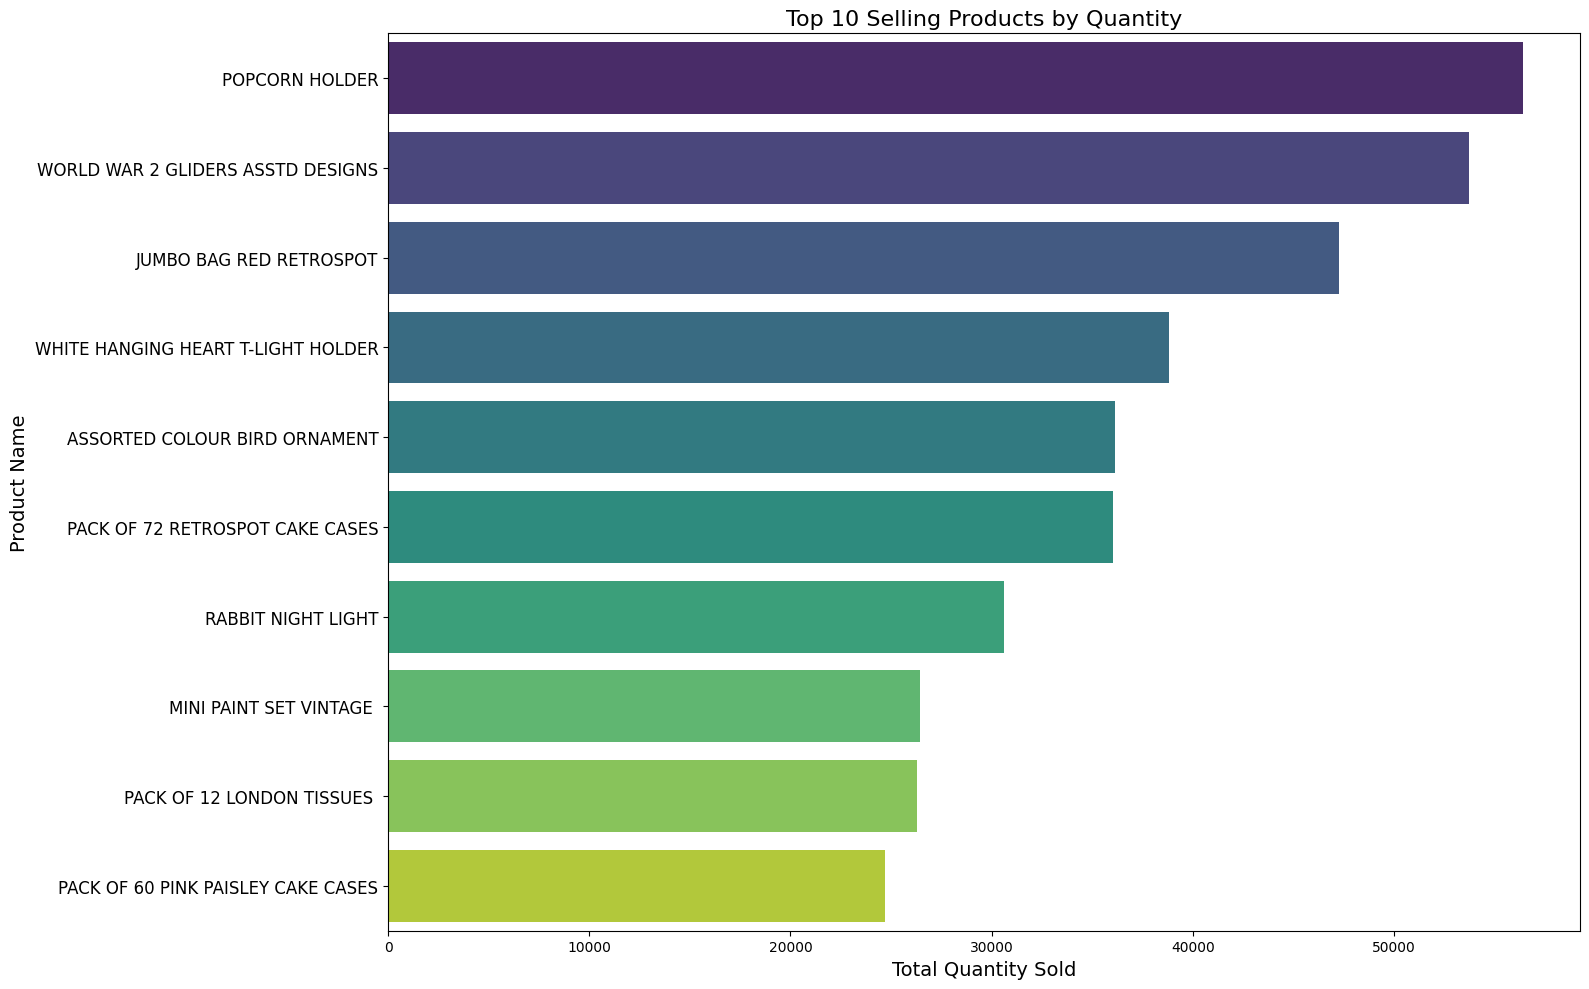

In [ ]:
# Plot for Total Quantity Sold
plt.figure(figsize=(16, 10))
sns.barplot(data=top_quantity_selling_products, x='TotalQuantitySold', y='ProductName', palette='viridis')
plt.title('Top 10 Selling Products by Quantity', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=14)
plt.ylabel('Product Name', fontsize=14)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0, fontsize=12)

# Adjust layout for better fit
plt.tight_layout()

# Save the plot
plt.savefig('top_selling_prdcts.png', dpi=300)
plt.show()

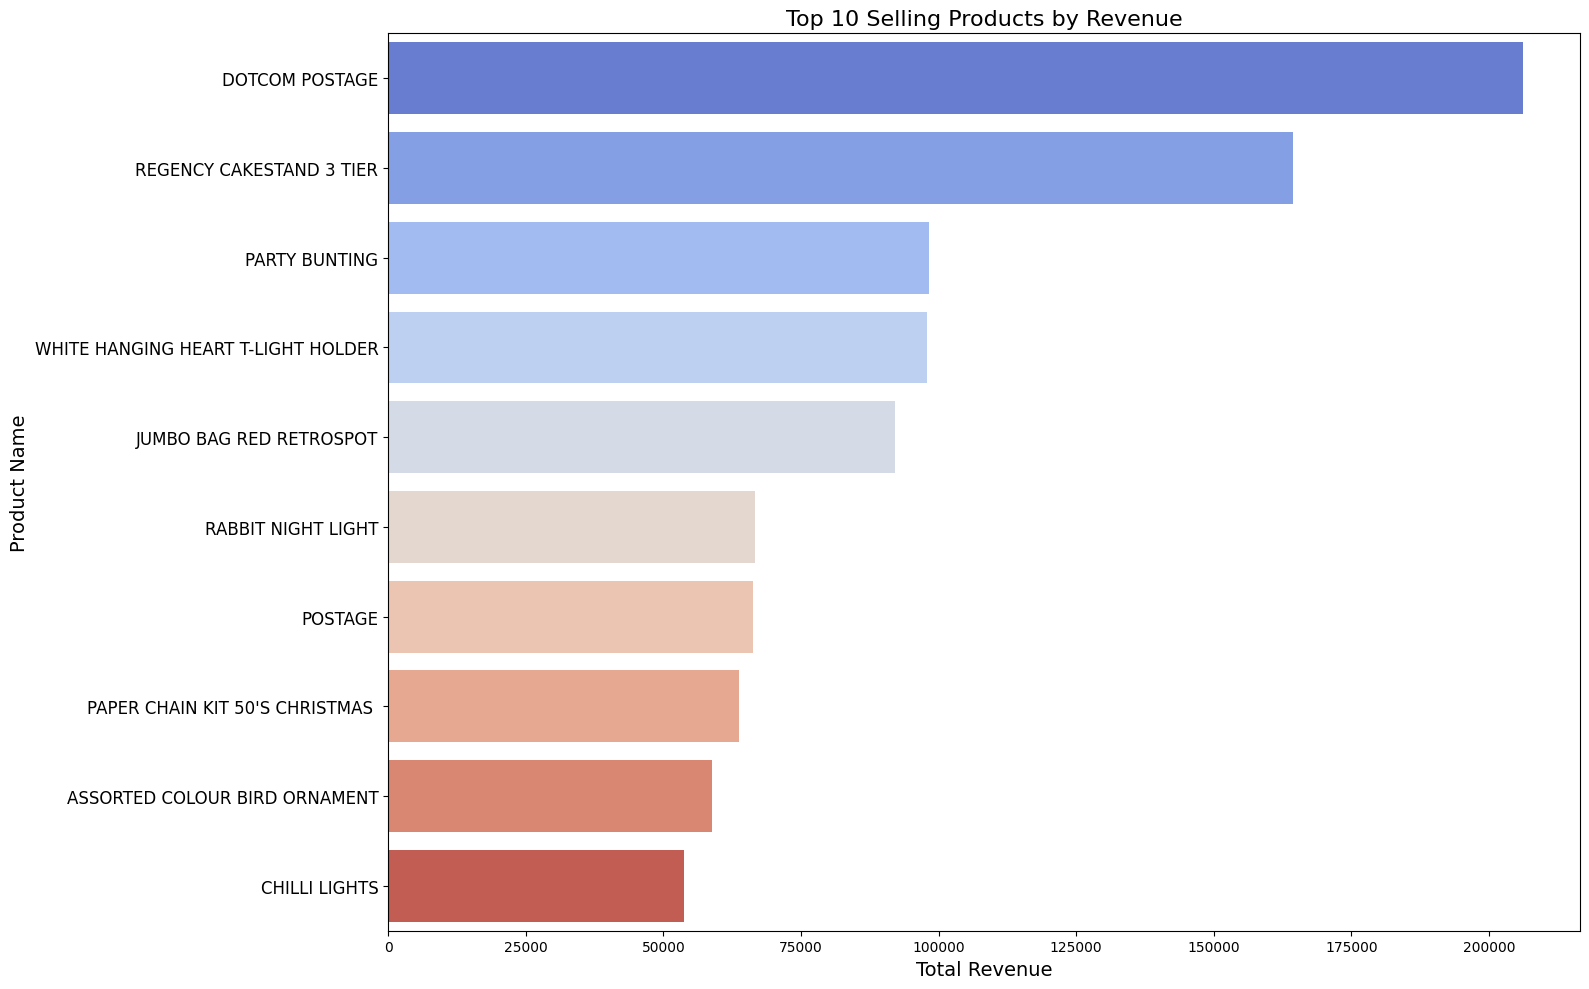

In [ ]:
# Plot for Total Revenue
plt.figure(figsize=(16, 10))
sns.barplot(data=top_revenue_selling_products, x='TotalRevenue', y='ProductName', palette='coolwarm')
plt.title('Top 10 Selling Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Product Name', fontsize=14)

# Rotate y-axis labels
plt.yticks(rotation=0, fontsize=12)  # Adjust rotation and font size if needed

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('top_prdcts_by_revenue.png', dpi=300)
plt.show()

In [ ]:
# Filter original DataFrame for top-selling products by revenue
top_selling_revenue_product_codes = top_revenue_selling_products['StockCode'].tolist()

# Filter product_df for top revenue products
top_revenue_products_df = product_df[product_df['StockCode'].isin(top_selling_revenue_product_codes)]

# Extract Year-Month and calculate monthly sales for top revenue products
top_revenue_products_df['InvoiceDate'] = pd.to_datetime(top_revenue_products_df['InvoiceDate'])
top_revenue_products_df['YearMonth'] = top_revenue_products_df['InvoiceDate'].dt.to_period('M')

# Calculate monthly total quantity sold and total revenue for top revenue products
monthly_top_revenue_analysis = top_revenue_products_df.groupby('YearMonth').agg(
    TotalQuantitySold=('Quantity', 'sum'),
    TotalRevenue=('TotalSpent', 'sum')
).reset_index()


monthly_top_revenue_analysis['YearMonth'] = monthly_top_revenue_analysis['YearMonth'].astype(str)


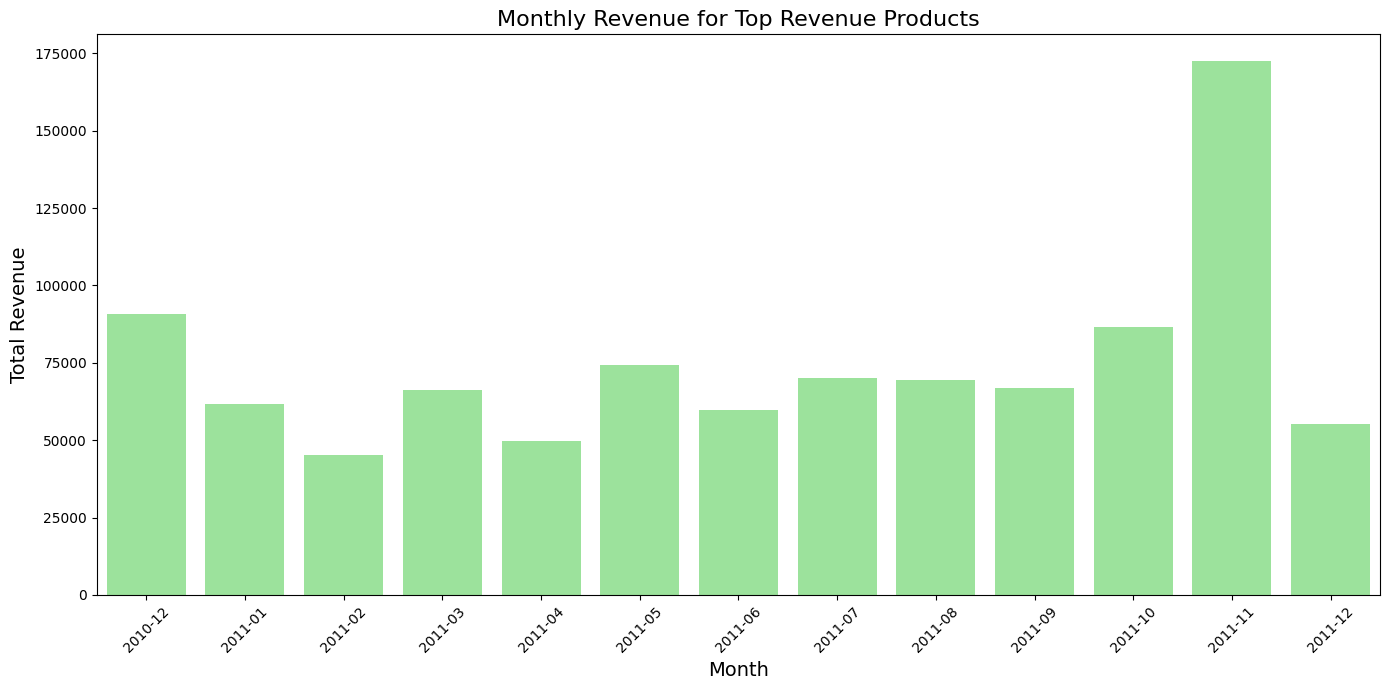

In [ ]:
# Plot Total Revenue for Top Revenue Products
plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_top_revenue_analysis, x='YearMonth', y='TotalRevenue', color='lightgreen')
plt.title('Monthly Revenue for Top Revenue Products', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: Top selling products fetch more revenue in the month of November 2011

Analyzing the products that are most frequently bought together

In [ ]:
!pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=acc128da16dc441fb3bd494e1dc42a03e70119c472a7102ca01b9745e79e5819
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import pandasql as psql
# Creating a Common Table Expression (CTE) with product and InvoiceNo
query = """
WITH cte AS (
    SELECT
        Description AS product,
        InvoiceNo AS basket_id
    FROM product_df
)
SELECT
    a.product AS product_1,
    b.product AS product_2,
    COUNT(DISTINCT a.basket_id) AS no_of_orders
FROM cte a
JOIN cte b
ON a.basket_id = b.basket_id AND a.product < b.product
GROUP BY a.product, b.product
ORDER BY no_of_orders DESC
"""

# Executing the query using pandasql
frequent_pairs = psql.sqldf(query, locals())


frequent_pairs.head(10)

,product_1,product_2,no_of_orders
0,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,833
1,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,784
2,JUMBO BAG RED RETROSPOT,JUMBO STORAGE BAG SUKI,733
3,JUMBO BAG RED RETROSPOT,JUMBO SHOPPER VINTAGE RED PAISLEY,683
4,LUNCH BAG RED RETROSPOT,LUNCH BAG SUKI DESIGN,663
5,LUNCH BAG BLACK SKULL.,LUNCH BAG RED RETROSPOT,648
6,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,646
7,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,644
8,PINK REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,614
9,LUNCH BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT,613


Insights on Top 5 Frequently Bought Together Products:

1. Jumbo Bag Pink Polkadot & Jumbo Bag Red Retrospot:
* Orders: 833
* Insight: This popular duo suggests strong customer preference for Jumbo Bags, making them ideal for promotional bundling.

2. Green Regency Teacup & Saucer & Roses Regency Teacup & Saucer:
* Orders: 784
* Insight: The trend towards coordinated tableware indicates potential for attracting home decor enthusiasts through joint marketing efforts.

3. Jumbo Bag Red Retrospot & Jumbo Storage Bag Suki:
* Orders: 733
* Insight: Reflecting demand for stylish storage solutions, promoting these items as a set could enhance sales.

4. Jumbo Bag Red Retrospot & Jumbo Shopper Vintage Red Paisley:
* Orders: 683
* Insight: Customers' interest in complementary bag styles suggests effective product placement strategies could boost visibility and sales.

5. Lunch Bag Red Retrospot & Lunch Bag Suki Design:
* Orders: 663
* Insight: The growing trend in stylish food storage options highlights a marketing opportunity targeting students and office workers

In [ ]:
# Merge RFM segments with product-level information
merged_df = product_df.merge(rfm[['CustomerID', 'Customer Segments']], on='CustomerID', how='left')

# Group by customer segments and product descriptions, counting occurrences of each product
product_count = merged_df.groupby(['Customer Segments', 'Description']).size().reset_index(name='Count')

# Get the top 5 most bought products for each customer segment
top_products_per_segment = product_count.sort_values(['Customer Segments', 'Count'], ascending=[True, False])
top_5_products = top_products_per_segment.groupby('Customer Segments').head(5).reset_index(drop=True)


print("Top 5 Most Bought Products for Each Customer Segment:")
print(top_5_products[['Customer Segments', 'Description', 'Count']])

Top 5 Most Bought Products for Each Customer Segment:
      Customer Segments                         Description  Count
0     At Risk Customers                      DOTCOM POSTAGE    191
1     At Risk Customers              JUMBO STORAGE BAG SUKI    167
2     At Risk Customers             JUMBO BAG RED RETROSPOT    165
3     At Risk Customers  WHITE HANGING HEART T-LIGHT HOLDER    160
4     At Risk Customers                       PARTY BUNTING    151
5           Cannot Lose                      DOTCOM POSTAGE    146
6           Cannot Lose            REGENCY CAKESTAND 3 TIER    134
7           Cannot Lose  WHITE HANGING HEART T-LIGHT HOLDER    134
8           Cannot Lose                       PARTY BUNTING    128
9           Cannot Lose             JUMBO BAG RED RETROSPOT    125
10            Champions            REGENCY CAKESTAND 3 TIER    129
11            Champions             JUMBO BAG RED RETROSPOT    128
12            Champions                            CARRIAGE     98
13      

In [ ]:
from prettytable import PrettyTable

# Creating a PrettyTable object
table = PrettyTable()

# Defining the columns
table.field_names = ["Customer Segment", "Product Description", "Count"]

# Addding rows to the table
for index, row in top_5_products.iterrows():
    table.add_row([row['Customer Segments'], row['Description'], row['Count']])


print(table)

+---------------------+------------------------------------+-------+
|   Customer Segment  |        Product Description         | Count |
+---------------------+------------------------------------+-------+
|  At Risk Customers  |           DOTCOM POSTAGE           |  191  |
|  At Risk Customers  |       JUMBO STORAGE BAG SUKI       |  167  |
|  At Risk Customers  |      JUMBO BAG RED RETROSPOT       |  165  |
|  At Risk Customers  | WHITE HANGING HEART T-LIGHT HOLDER |  160  |
|  At Risk Customers  |           PARTY BUNTING            |  151  |
|     Cannot Lose     |           DOTCOM POSTAGE           |  146  |
|     Cannot Lose     |      REGENCY CAKESTAND 3 TIER      |  134  |
|     Cannot Lose     | WHITE HANGING HEART T-LIGHT HOLDER |  134  |
|     Cannot Lose     |           PARTY BUNTING            |  128  |
|     Cannot Lose     |      JUMBO BAG RED RETROSPOT       |  125  |
|      Champions      |      REGENCY CAKESTAND 3 TIER      |  129  |
|      Champions      |      JUMBO

Observations:

* At Risk Customers:

The most purchased products include everyday items such as "DOTCOM POSTAGE" and "JUMBO STORAGE BAG SUKI."
The relatively high counts suggest that these customers may still find value in common products, indicating potential for retention strategies.

* Cannot Lose:

Products like "DOTCOM POSTAGE" and "REGENCY CAKESTAND 3 TIER" are also popular in this segment.
These products can be leveraged for targeted marketing campaigns to ensure customer loyalty.

* Champions:

This segment favors higher-quality or more decorative items such as "REGENCY CAKESTAND 3 TIER" and "JUMBO BAG RED RETROSPOT."
The strong purchases suggest these customers appreciate and are willing to spend on quality items, indicating opportunities for upselling or exclusive offers.

* Lost Customers:

"DOTCOM POSTAGE" remains a top product in this group, along with other household items.
The presence of these products indicates that these customers may have previously engaged with everyday purchases but have since dropped off, presenting an opportunity for re-engagement through promotions on familiar products.

* Potential Loyalists:

This segment shows significantly higher purchase counts, especially for "WHITE HANGING HEART T-LIGHT HOLDER" and "REGENCY CAKESTAND 3 TIER," suggesting these customers are heavily invested in the brand.
Targeted loyalty programs or promotions on these popular items could further enhance retention and repeat purchases.

Key Point:

The products DOTCOM POSTAGE, JUMBO BAG RED RETROSPOT, WHITE HANGING HEART T-LIGHT HOLDER, PARTY BUNTING, and REGENCY CAKESTAND 3 TIER are common in both the At Risk Customers and Cannot Lose segments, and we can leverage this information by creating targeted promotions or campaigns around these items to enhance customer retention.

In [ ]:
# Analysing Cancellation and Return Rate within segments

In [ ]:
# Merge customer_df with rfm to include Customer Segments
merged_df = customer_df.merge(rfm[['CustomerID', 'Customer Segments']], on='CustomerID', how='left')
merged_df['Total Orders']=merged_df['TotalOrders']-merged_df['TotalCancelledOrders']

# Group by customer segments and calculate total cancelled and returned orders
cancellation_data = merged_df.groupby('Customer Segments').agg(
    TotalCancelledOrders=('TotalCancelledOrders', 'sum'),
    TotalReturnOrders=('TotalReturnOrders', 'sum'),
    TotalOrders=('Total Orders', 'sum')
).reset_index()

# Calculate Cancellation Rate and Return Rate
cancellation_data['CancellationRate'] = (
    cancellation_data['TotalCancelledOrders'] / cancellation_data['TotalOrders']
) * 100

# Calculate Return Rate
cancellation_data['ReturnRate'] = (
    cancellation_data['TotalReturnOrders'] / cancellation_data['TotalOrders']
) * 100


cancellation_data[['Customer Segments', 'CancellationRate', 'ReturnRate']]

,Customer Segments,CancellationRate,ReturnRate
0,At Risk Customers,13.404114,16.522893
1,Cannot Lose,9.330144,27.033493
2,Champions,19.195751,0.000000
3,Lost,11.680328,19.979508
4,Potential Loyalists,18.519607,3.251220


Observations:

* At Risk Customers:

Cancellation Rate: 13.40% | Return Rate: 16.52%
Insight: Moderate cancellations and high returns indicate potential dissatisfaction. Personalized follow-ups and incentives may help reduce these metrics.

* Cannot Lose:

Cancellation Rate: 9.33% | Return Rate: 27.03%
Insight: Lowest cancellations but high returns suggest issues with product quality. Targeted promotions and product improvements could enhance satisfaction.
Champions:

Cancellation Rate: 19.20% | Return Rate: 0.00%
Insight: High cancellations with no returns may signal unrelated issues. Understanding their motivations is key for retention.

* Lost Customers:

Cancellation Rate: 11.68% | Return Rate: 19.98%.

* Potential Loyalists:

Cancellation Rate: 18.52% | Return Rate: 3.25%
Insight: High cancellations and low returns present an opportunity to enhance their experience and foster loyalty.

Key Point:

Given the problematic nature of high return rates observed in "Lost Customers," it's essential to take precautions for both "At Risk" and "Cannot Lose" segments, as they also exhibit elevated return rates. Implementing proactive measures and improving product quality could help mitigate these issues and improve customer retention

# Insights:

* Customer Demographics:

    The dataset contains 8,082 unique customers, with 94% hailing from the UK. This indicates a concentrated customer base, suggesting potential for localized marketing strategies.
* Return and Cancellation Rates:

    * The return rate stands at approximately 5.16%, meaning that around 5% of total orders are returned.
    * The cancellation rate is approximately 14.81%, indicating that about 15% of total orders are canceled.
    * When returns occur, the average quantity of items returned is 25.61, reflecting potential inventory and financial impacts.
    * Cancellations tend to involve 34.10 items on average, with a significant average cancellation amount of 110.61, suggesting substantial financial implications.

* Key Metrics:

   * Total Revenue: £10,663,683
   * Total Orders: 22,064
   * Total Quantity: 5,851,673
   * Average Revenue per Order: £483.31
   * Average Revenue per Product: £2,620.07

* Notably, 18.79% of customers contribute to 80% of the total revenue, indicating a heavy reliance on a small number of top-spending customers.

* Daily and Hourly Revenue Trends:

   * Thursday generates the highest revenue of £2.2 million, with a large order volume but lower average order value.
   * Tuesday has the highest average order value of £547.62, suggesting that customers tend to place higher-value orders on this day.
   * Sunday shows lower performance in both total and average revenue, indicating it may be a low-demand day.
   * Morning hours yield the highest revenue at £5.43 million, while revenue significantly drops during the night and early dawn.

* RFM Segmentation:

   * 59.54% of customers fall into the Mid-Value segment, indicating potential for growth if targeted appropriately.
   * 40.11% are classified as Low-Value, suggesting the need for targeted re-engagement efforts.
   * Only 0.34% are categorized as High-Value, indicating a heavy reliance on a small group of customers for revenue.
   * 59.7% are potential loyalists, while 11.6% are classified as lost customers.

* Seasonal and Monthly Trends:

   * Peak sales occur in December 2010 and November 2011, likely due to holiday shopping.
   * The data shows variability in monthly revenues, with a drop post-holidays in early months.
   * Average Revenue Per Order (AOV) fluctuates, indicating seasonal variations in purchasing behavior.

* Product Insights:

   * High-demand products across segments include everyday items like DOTCOM POSTAGE and JUMBO STORAGE BAG SUKI, indicating potential for retention strategies.
   * Products favored by high-value customers include REGENCY CAKESTAND 3 TIER, suggesting upselling opportunities.

# Recommendations:

* Investigate and address the factors contributing to the 5.16% return rate and 14.81% cancellation rate, implementing customer feedback loops and product quality improvements.

* Implement personalized marketing campaigns aimed at the Mid-Value and Low-Value segments to increase their purchase frequency and average spending, especially leading up to peak months.

* Develop targeted loyalty programs for Potential Loyalists and At Risk customers to encourage higher engagement and spending, including exclusive offers and rewards.

* Create re-engagement strategies for Lost Customers, such as special promotions or surveys to understand their reasons for leaving, and personalized outreach with discounts.

* Design retention strategies for At Risk customers to ensure they feel valued through consistent engagement and loyalty incentives, with follow-ups to encourage repeat purchases.

* Focus marketing efforts on Thursdays and Mornings, where revenue is highest, while exploring ways to improve sales on Sundays through targeted promotions.

* Leverage the popularity of high-demand products like DOTCOM POSTAGE and REGENCY CAKESTAND 3 TIER for targeted marketing campaigns to At Risk and Cannot Lose customers.

* Promotional Bundling: Create promotional bundles for frequently bought together items, particularly the Jumbo Bags and stylish tableware sets, to drive sales and enhance customer appeal.

* Continuously monitor seasonal trends and customer purchasing behaviors to adjust strategies, utilizing seasonal product launches or targeted marketing campaigns aligned with identified interests.